# **CRISP-DM: Projeto de Análise Educacional**

## **1. Entendimento do Negócio**
- **Objetivos do Projeto:**
  - **Análise Comparativa:** Comparar o desempenho dos alunos em diferentes regiões, escolas, ou séries.
  - **Fatores Determinantes:** Identificar os fatores que mais influenciam o desempenho dos alunos.
  - **Modelagem Preditiva:** Prever a perfomance futuro dos alunos com base em dados históricos.

- **Perguntas-Chave:**
  - Quais regiões/estados apresentam os melhores e os piores desempenhos?
  - Como variáveis como infraestrutura escolar, formação dos professores e características socioeconômicas impactam o desempenho dos alunos?
  - É possível prever a perfomance futuro dos alunos com base nos dados históricos?

## **2. Entendimento dos Dados**
- **Descrição dos Dados:**
  - O dataset contém informações detalhadas sobre o desempenho dos alunos, infraestrutura das escolas, localização, e outros fatores relevantes.
 
  - 
### Tabela de Variáveis (Traduzida):

|     | Nome da Coluna            | Descrição                                              | Tipo de Dado  |
| --- | ------------------------- | ------------------------------------------------------ | ------------- |
| 0   | ano                       | Ano de coleta dos dados                                | int64         |
| 1   | id_regiao                 | ID da região                                           | int64         |
| 2   | sigla_uf                  | Sigla do estado (UF)                                   | object        |
| 3   | id_municipio              | ID do município                                        | int64         |
| 4   | area                      | Área (rural/urbana)                                    | int64         |
| 5   | id_escola                 | ID da escola                                           | int64         |
| 6   | rede                      | Rede de ensino (1 = pública, 2 = privada)              | float64       |
| 7   | localizacao               | Localização (1 = urbana, 2 = rural)                    | int64         |
| 8   | id_turma                  | ID da turma                                            | int64         |
| 9   | turno                     | Turno da turma (1 = manhã, 2 = tarde, etc.)            | float64       |
| 10  | serie                     | Série escolar                                          | int64         |
| 11  | id_aluno                  | ID do aluno                                            | int64         |
| 12  | situacao_censo            | Situação do aluno no censo escolar                     | int64         |
| 13  | disciplina                | Disciplina (matemática, português, etc.)               | object        |
| 14  | preenchimento_caderno     | Indicador de preenchimento do caderno                  | int64         |
| 15  | presenca                  | Indicador de presença                                  | int64         |
| 16  | caderno                   | Tipo de caderno de avaliação                           | int64         |
| 17  | bloco_1                   | Respostas do bloco 1                                   | int64         |
| 18  | bloco_2                   | Respostas do bloco 2                                   | int64         |
| 19  | bloco_1_aberto            | Questões abertas do bloco 1                            | int64         |
| 20  | bloco_2_aberto            | Questões abertas do bloco 2                            | int64         |
| 21  | respostas_bloco_1         | Respostas completas do bloco 1                         | float64       |
| 22  | respostas_bloco_2         | Respostas completas do bloco 2                         | float64       |
| 23  | conceito_q1               | Conceito na questão 1                                  | object        |
| 24  | conceito_q2               | Conceito na questão 2                                  | object        |
| 25  | resposta_texto            | Resposta textual                                       | object        |
| 26  | conceito_proposito        | Conceito sobre propósito                               | object        |
| 27  | conceito_elemento         | Conceito sobre elementos                               | object        |
| 28  | conceito_segmentacao      | Conceito sobre segmentação                             | object        |
| 29  | texto_grafia              | Análise da grafia do texto                             | object        |
| 30  | indicador_proficiencia    | Indicador de proficiência dos alunos                   | int64         |
| 31  | amostra                   | Indicador de amostra                                   | int64         |
| 32  | estrato                   | Estrato da amostra                                     | int64         |
| 33  | peso_aluno                | Peso do aluno na amostra                               | float64       |
| 34  | proficiencia              | Nível de proficiência do aluno                         | float64       |
| 35  | erro_padrao               | Erro padrão na avaliação da proficiência               | float64       |
| 36  | proficiencia_saeb         | Nível de proficiência SAEB (Sistema de Avaliação)      | float64       |
| 37  | erro_padrao_saeb          | Erro padrão do nível de proficiência SAEB              | float64       |

# Bibliotecas

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import joblib
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer  
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
df=pd.read_csv("br_inep_saeb_aluno_ef_2ano.csv", na_values="na")

display(df)

,ano,id_regiao,sigla_uf,id_municipio,area,id_escola,rede,localizacao,id_turma,turno,...,conceito_segmentacao,texto_grafia,indicador_proficiencia,amostra,estrato,peso_aluno,proficiencia,erro_padrao,proficiencia_saeb,erro_padrao_saeb
0,2021,1,TO,6317045,2,61394315,NaN,1,1387439,NaN,...,.,.,0,1,17312,NaN,NaN,NaN,NaN,NaN
1,2021,1,TO,6317045,2,61394315,NaN,1,1387439,NaN,...,NaN,NaN,0,1,17312,NaN,NaN,NaN,NaN,NaN
2,2021,1,TO,6317045,2,61394315,NaN,1,1387439,NaN,...,NaN,NaN,0,1,17312,NaN,NaN,NaN,NaN,NaN
3,2021,1,TO,6317045,2,61394315,NaN,1,1387439,NaN,...,NaN,NaN,0,1,17312,NaN,NaN,NaN,NaN,NaN
4,2021,1,TO,6317045,2,61394315,NaN,1,1387439,NaN,...,.,.,0,1,17312,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231209,2019,3,RJ,6314293,2,61312254,3.0,1,1198326,1.0,...,A,A,1,1,33312,109.592502,0.506275,0.391827,776.273706,21.709695
231210,2019,3,RJ,6314293,2,61312254,3.0,1,1198326,1.0,...,B,A,1,1,33312,109.592502,-0.561617,0.321862,717.105731,17.833192
231211,2019,3,RJ,6314293,2,61312254,3.0,1,1198326,1.0,...,A,A,1,1,33312,109.592502,-0.453720,0.301303,723.083908,16.694093
231212,2019,3,RJ,6314293,2,61312254,3.0,1,1198326,1.0,...,B,A,1,1,33312,109.592502,-0.179863,0.328719,738.257319,18.213113


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231214 entries, 0 to 231213
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ano                     231214 non-null  int64  
 1   id_regiao               231214 non-null  int64  
 2   sigla_uf                231214 non-null  object 
 3   id_municipio            231214 non-null  int64  
 4   area                    231214 non-null  int64  
 5   id_escola               231214 non-null  int64  
 6   rede                    171576 non-null  float64
 7   localizacao             231214 non-null  int64  
 8   id_turma                231214 non-null  int64  
 9   turno                   171576 non-null  float64
 10  serie                   231214 non-null  int64  
 11  id_aluno                231214 non-null  int64  
 12  situacao_censo          231214 non-null  int64  
 13  disciplina              231214 non-null  object 
 14  preenchimento_cadern

In [7]:
df.shape

(231214, 38)

In [8]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sigla_uf,231214,27,AM,13448
disciplina,231214,2,LP,115607
conceito_q1,231214,16,A,50825
conceito_q2,231214,17,A,49661
resposta_texto,231214,3,TX,133214
conceito_proposito,115607,4,A,41633
conceito_elemento,115607,7,.,31155
conceito_segmentacao,115607,5,A,47200
texto_grafia,115607,4,A,65755


In [14]:
# Remover múltiplas colunas passando uma lista
df_numeric = df.drop(['id_regiao', 'id_municipio', 'id_escola', 'id_turma', 'id_aluno'], axis=1).select_dtypes(include='number')

# Descreve e transpõe as colunas numéricas
df_numeric.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
ano,231214.0,2.019516e+03,8.749971e-01,2019.000000,2019.000000,2019.000000,2021.000000,2.021000e+03
area,231214.0,1.616598e+00,4.862160e-01,1.000000,1.000000,2.000000,2.000000,2.000000e+00
rede,171576.0,3.036240e+00,7.722895e-01,1.000000,3.000000,3.000000,4.000000,4.000000e+00
localizacao,231214.0,1.155112e+00,3.620119e-01,1.000000,1.000000,1.000000,1.000000,2.000000e+00
turno,171576.0,1.484730e+00,4.997682e-01,1.000000,1.000000,1.000000,2.000000,2.000000e+00
serie,231214.0,2.000000e+00,0.000000e+00,2.000000,2.000000,2.000000,2.000000,2.000000e+00
situacao_censo,231214.0,9.932703e-01,8.175840e-02,0.000000,1.000000,1.000000,1.000000,1.000000e+00
preenchimento_caderno,231214.0,7.468103e-01,4.348396e-01,0.000000,0.000000,1.000000,1.000000,1.000000e+00
presenca,231214.0,7.500238e-01,4.329999e-01,0.000000,1.000000,1.000000,1.000000,1.000000e+00
caderno,231214.0,1.097750e+01,6.062654e+00,1.000000,6.000000,11.000000,16.000000,2.200000e+01


In [16]:
df.isna().any()

ano                       False
id_regiao                 False
sigla_uf                  False
id_municipio              False
area                      False
id_escola                 False
rede                       True
localizacao               False
id_turma                  False
turno                      True
serie                     False
id_aluno                  False
situacao_censo            False
disciplina                False
preenchimento_caderno     False
presenca                  False
caderno                   False
bloco_1                   False
bloco_2                   False
bloco_1_aberto            False
bloco_2_aberto            False
respostas_bloco_1          True
respostas_bloco_2          True
conceito_q1               False
conceito_q2               False
resposta_texto            False
conceito_proposito         True
conceito_elemento          True
conceito_segmentacao       True
texto_grafia               True
indicador_proficiencia    False
amostra 

In [18]:
missing_values = df.isnull().sum()
missing_values

ano                            0
id_regiao                      0
sigla_uf                       0
id_municipio                   0
area                           0
id_escola                      0
rede                       59638
localizacao                    0
id_turma                       0
turno                      59638
serie                          0
id_aluno                       0
situacao_censo                 0
disciplina                     0
preenchimento_caderno          0
presenca                       0
caderno                        0
bloco_1                        0
bloco_2                        0
bloco_1_aberto                 0
bloco_2_aberto                 0
respostas_bloco_1         231214
respostas_bloco_2         231214
conceito_q1                    0
conceito_q2                    0
resposta_texto                 0
conceito_proposito        115607
conceito_elemento         115607
conceito_segmentacao      115607
texto_grafia              115607
indicador_

# Limpeza de dados e tratamento

In [21]:
# Remover colunas indesejadas
colunas_para_remover = ['id_regiao', 'id_municipio', 'id_escola', 'id_turma', 'id_aluno', 'respostas_bloco_1', 'respostas_bloco_2']
df.drop(columns=colunas_para_remover, inplace=True)

# Verificar o resultado
display(df)


,ano,sigla_uf,area,rede,localizacao,turno,serie,situacao_censo,disciplina,preenchimento_caderno,...,conceito_segmentacao,texto_grafia,indicador_proficiencia,amostra,estrato,peso_aluno,proficiencia,erro_padrao,proficiencia_saeb,erro_padrao_saeb
0,2021,TO,2,NaN,1,NaN,2,1,LP,0,...,.,.,0,1,17312,NaN,NaN,NaN,NaN,NaN
1,2021,TO,2,NaN,1,NaN,2,1,MT,0,...,NaN,NaN,0,1,17312,NaN,NaN,NaN,NaN,NaN
2,2021,TO,2,NaN,1,NaN,2,1,MT,0,...,NaN,NaN,0,1,17312,NaN,NaN,NaN,NaN,NaN
3,2021,TO,2,NaN,1,NaN,2,1,MT,0,...,NaN,NaN,0,1,17312,NaN,NaN,NaN,NaN,NaN
4,2021,TO,2,NaN,1,NaN,2,1,LP,0,...,.,.,0,1,17312,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231209,2019,RJ,2,3.0,1,1.0,2,1,LP,1,...,A,A,1,1,33312,109.592502,0.506275,0.391827,776.273706,21.709695
231210,2019,RJ,2,3.0,1,1.0,2,1,LP,1,...,B,A,1,1,33312,109.592502,-0.561617,0.321862,717.105731,17.833192
231211,2019,RJ,2,3.0,1,1.0,2,1,LP,1,...,A,A,1,1,33312,109.592502,-0.453720,0.301303,723.083908,16.694093
231212,2019,RJ,2,3.0,1,1.0,2,1,LP,1,...,B,A,1,1,33312,109.592502,-0.179863,0.328719,738.257319,18.213113


In [22]:
# Verificar se existem duplicatas no DataFrame
duplicatas = df.duplicated().sum()
print(f"\nNúmero de linhas duplicadas: {duplicatas}")


Número de linhas duplicadas: 53417


In [24]:
# Remover linhas duplicadas
df = df.drop_duplicates()

# Verificar o número de linhas duplicadas removidas
duplicatas_removidas = df.shape[0] - df.shape[0]
print(f"\nNúmero de linhas duplicadas removidas: {duplicatas_removidas}")

# Verificar se ainda existem duplicatas
duplicatas_restantes = df.duplicated().sum()
print(f"\nNúmero de linhas duplicadas restantes: {duplicatas_restantes}")



Número de linhas duplicadas removidas: 0

Número de linhas duplicadas restantes: 0


In [25]:
df.shape

(177797, 31)

# Análise Exploratória

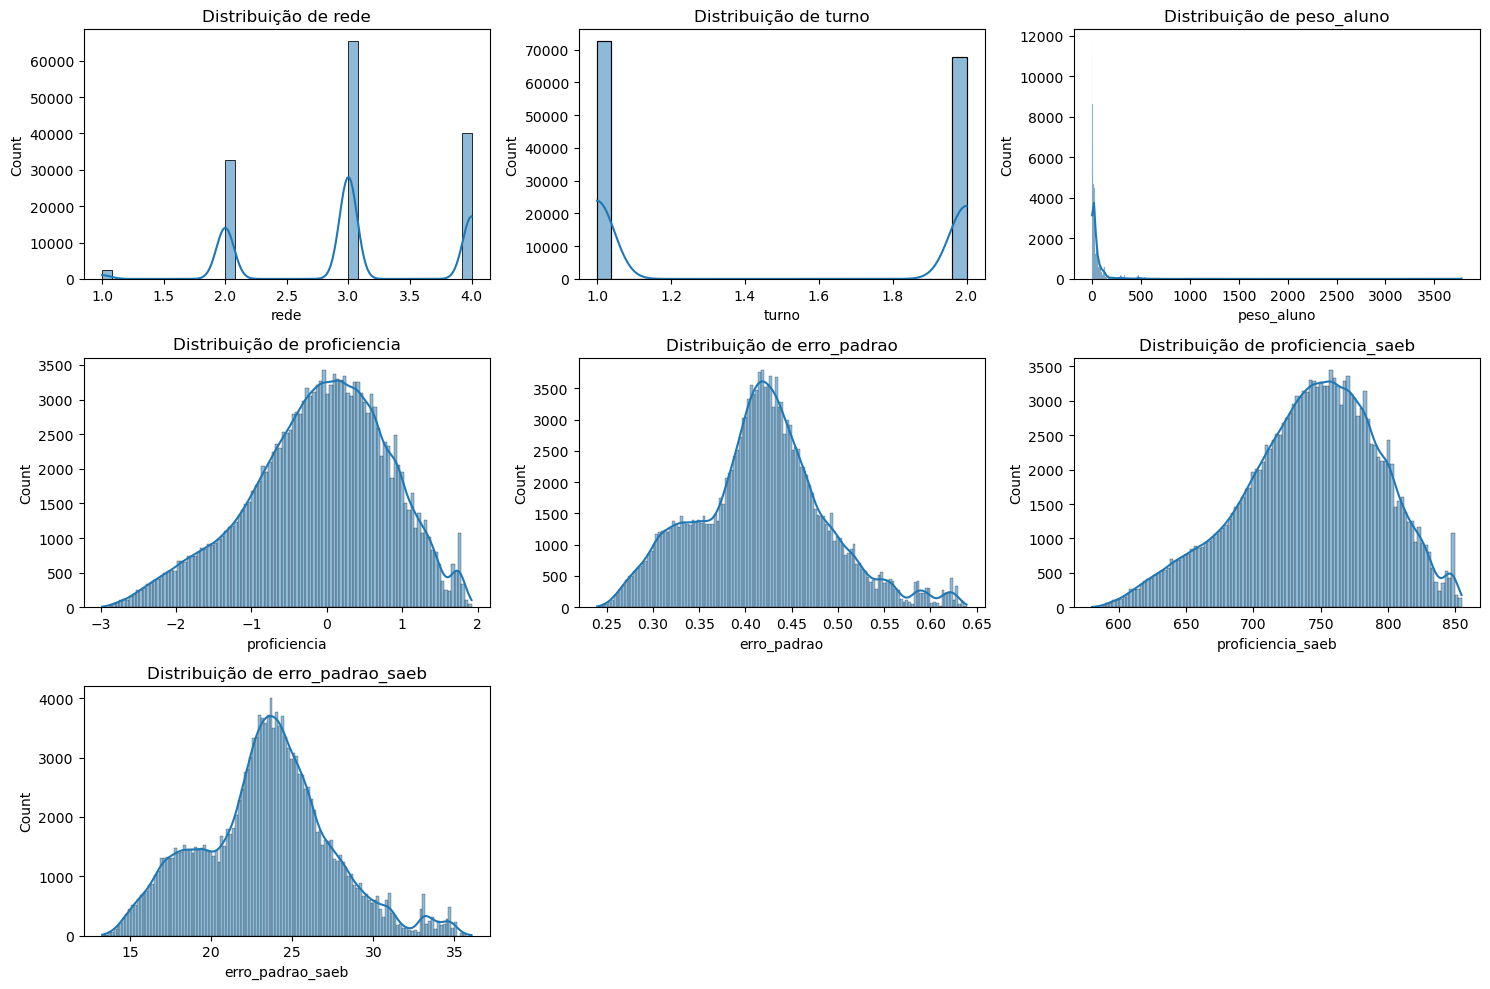

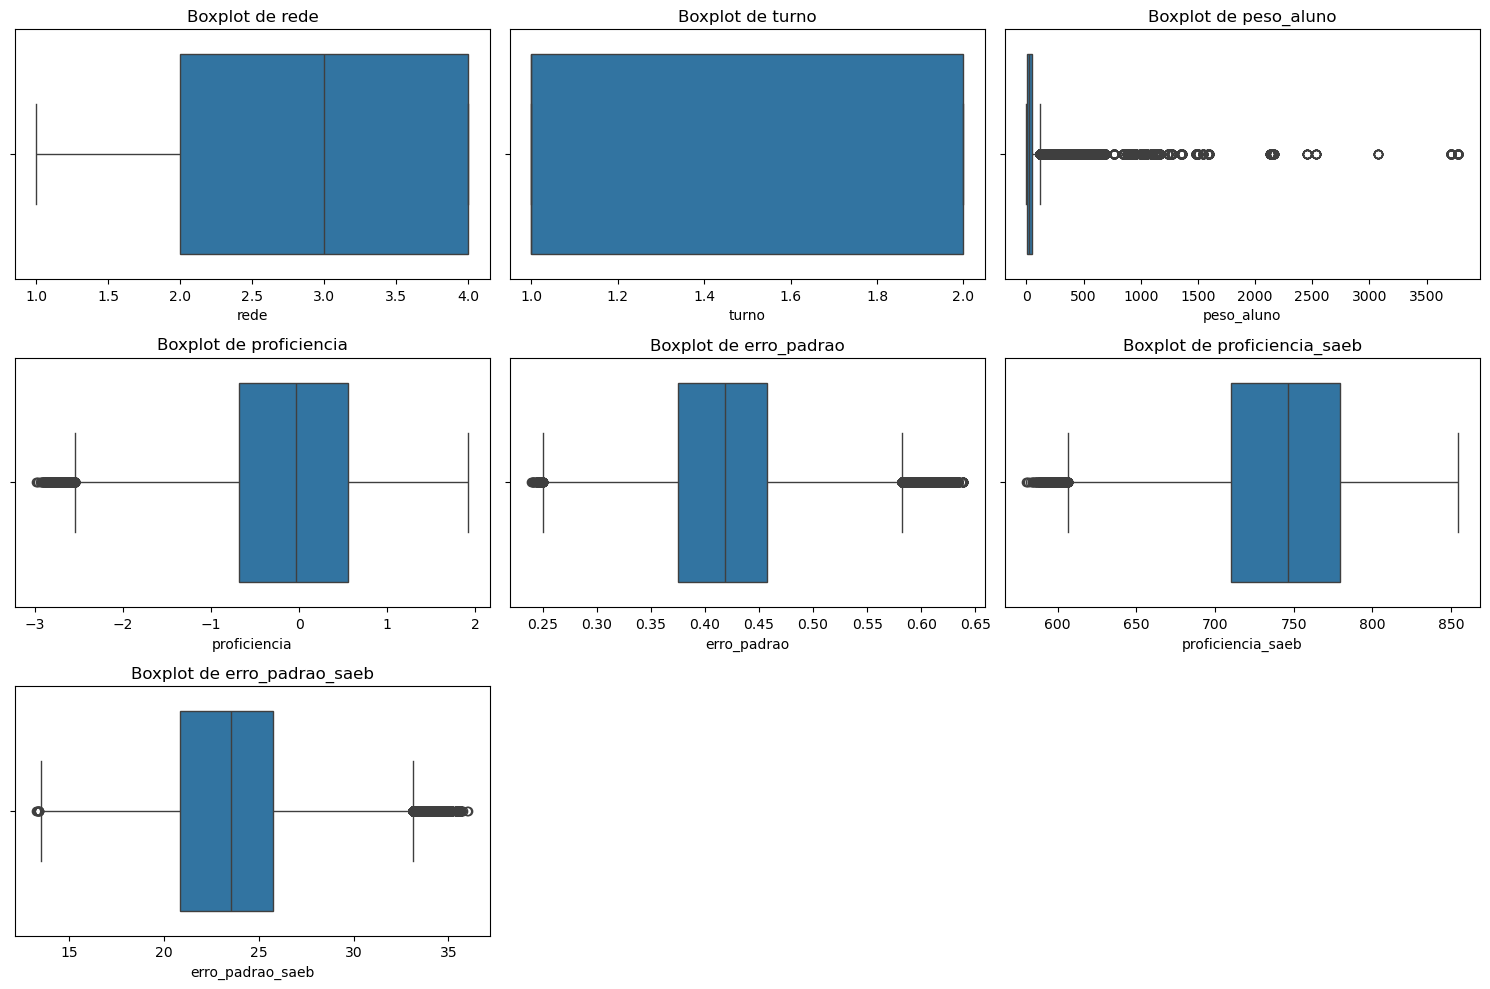

In [28]:
# Variáveis contínuas
variaveis_continuas = ['rede', 'turno', 'peso_aluno', 'proficiencia', 'erro_padrao', 'proficiencia_saeb', 'erro_padrao_saeb']

# Histograma
plt.figure(figsize=(15, 10))
for i, var in enumerate(variaveis_continuas):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[var].dropna(), kde=True)
    plt.title(f'Distribuição de {var}')
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(15, 10))
for i, var in enumerate(variaveis_continuas):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
plt.tight_layout()
plt.show()


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177797 entries, 0 to 231213
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ano                     177797 non-null  int64  
 1   sigla_uf                177797 non-null  object 
 2   area                    177797 non-null  int64  
 3   rede                    140501 non-null  float64
 4   localizacao             177797 non-null  int64  
 5   turno                   140501 non-null  float64
 6   serie                   177797 non-null  int64  
 7   situacao_censo          177797 non-null  int64  
 8   disciplina              177797 non-null  object 
 9   preenchimento_caderno   177797 non-null  int64  
 10  presenca                177797 non-null  int64  
 11  caderno                 177797 non-null  int64  
 12  bloco_1                 177797 non-null  int64  
 13  bloco_2                 177797 non-null  int64  
 14  bloco_1_aberto          1

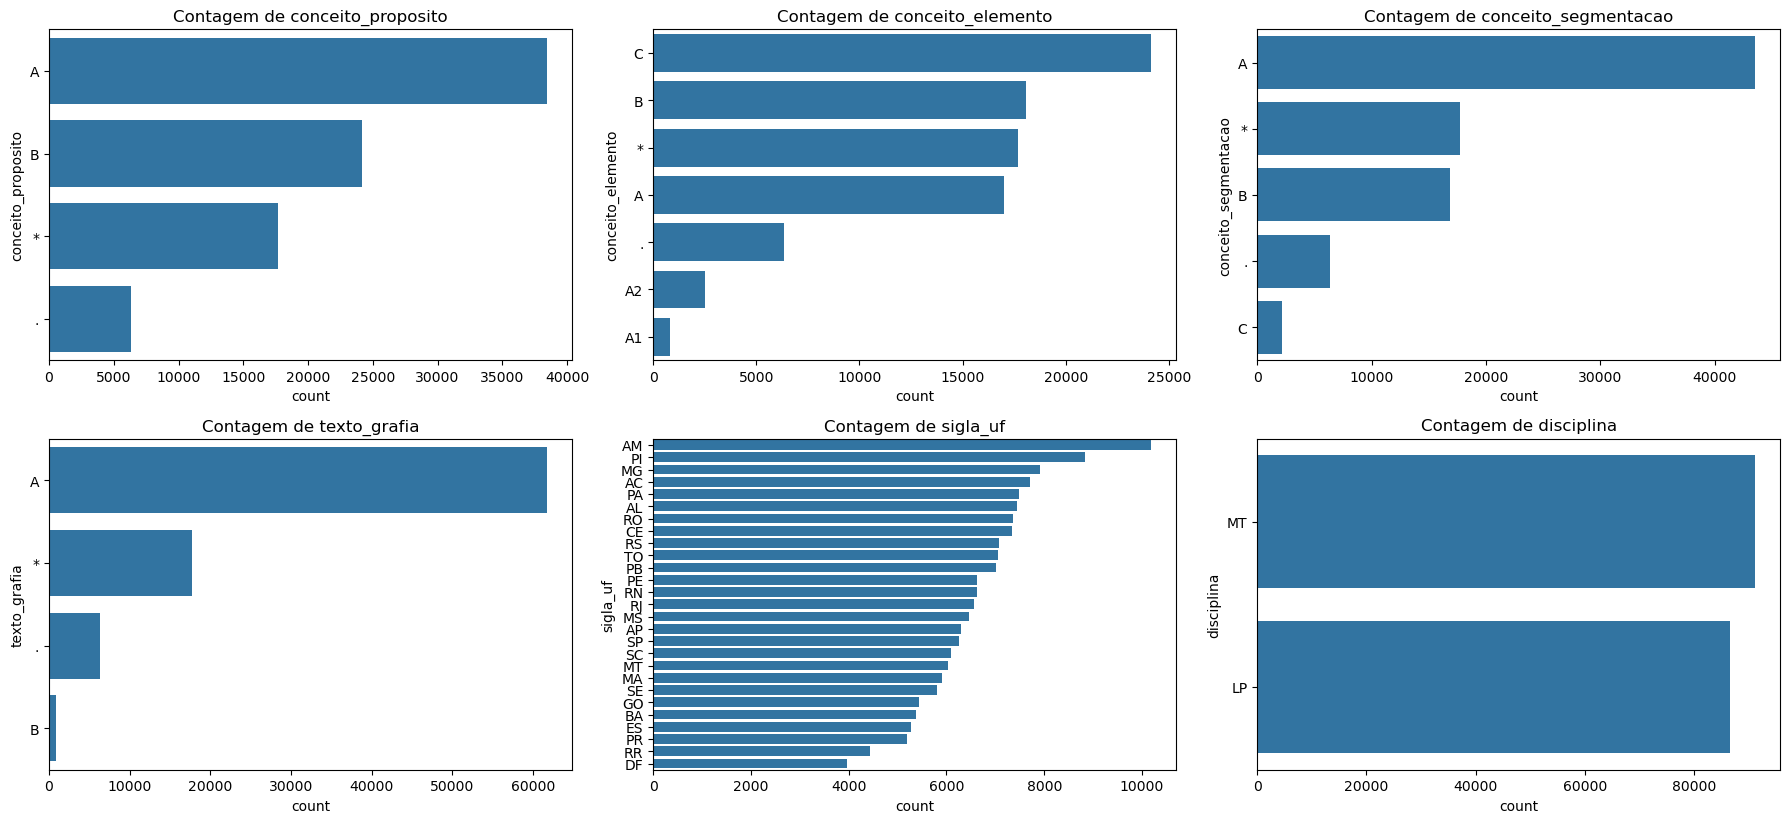

In [30]:
# Variáveis categóricas
variaveis_categoricas = ['conceito_proposito', 'conceito_elemento', 'conceito_segmentacao', 'texto_grafia', 
                         'sigla_uf', 'disciplina']

plt.figure(figsize=(18, 12)) 
for i, var in enumerate(variaveis_categoricas):
    plt.subplot(3, 3, i + 1)
    sns.countplot(y=df[var], order=df[var].value_counts().index)
    plt.title(f'Contagem de {var}')
plt.tight_layout()
plt.show()

In [33]:
# Estatísticas descritivas
print(df[variaveis_continuas].describe())


                rede          turno     peso_aluno   proficiencia  \
count  140501.000000  140501.000000  164602.000000  165125.000000   
mean        3.017758       1.483207      60.736186      -0.107479   
std         0.765310       0.499720     172.422884       0.916142   
min         1.000000       1.000000       0.785185      -2.980093   
25%         2.000000       1.000000       7.888819      -0.683435   
50%         3.000000       1.000000      21.396994      -0.031315   
75%         4.000000       2.000000      52.625746       0.553205   
max         4.000000       2.000000    3778.146400       1.920608   

         erro_padrao  proficiencia_saeb  erro_padrao_saeb  
count  165125.000000      165125.000000     165125.000000  
mean        0.417562         742.433173         23.388418  
std         0.070079          51.245648          4.005402  
min         0.239568         580.177072         13.273583  
25%         0.374816         710.177673         20.847407  
50%         0.4183

## Insights da Estatística Descritiva

1. **Rede de Ensino**:
   - A variável "rede" apresenta valores entre 1 e 4, com uma média de 3, o que indica que a maioria das observações está em uma rede de ensino correspondente ao valor 3. 
   - O desvio padrão é de 0.76, sugerindo uma variação moderada entre as redes de ensino representadas.

2. **Turno**:
   - A maioria dos alunos estão no turno 1 (provavelmente turno diurno), já que o valor mínimo, o primeiro quartil e a mediana são 1.
   - Apenas 25% dos alunos estão no turno 2 (provavelmente turno noturno), conforme indicado pelo terceiro quartil, sendo este o valor máximo.

3. **Peso do Aluno**:
   - O peso dos alunos varia drasticamente, de 0.78 a 3778.15, com uma média de 60.74. 
   - O desvio padrão de 172.42 indica que há uma grande dispersão nos pesos, sugerindo a presença de outliers ou alunos com pesos significativamente diferentes da maioria.
   - A mediana é de 21.40, indicando que metade dos alunos têm peso abaixo desse valor, o que é bem inferior à média.

4. **Proficiência**:
   - A proficiência dos alunos varia de -2.98 a 1.92, com uma média negativa de -0.11, sugerindo um desempenho geral levemente abaixo da média.
   - O desvio padrão de 0.92 mostra uma variação considerável nos níveis de proficiência.
   - O primeiro quartil (-0.68) e o terceiro quartil (0.55) indicam que 50% dos alunos estão dentro desse intervalo, com uma tendência central perto de 0.

5. **Erro Padrão da Proficiência**:
   - O erro padrão médio da proficiência é 0.42, com um intervalo de 0.24 a 0.64, indicando que a incerteza sobre as estimativas de proficiência é relativamente pequena.

6. **Proficiência SAEB**:
   - A proficiência SAEB tem uma média de 742.43 e uma variação significativa entre os alunos, com valores variando de 580.18 a 854.64.
   - O desvio padrão de 51.25 revela uma variação substancial nas pontuações.
   - A mediana de 746.68 indica que a maioria dos alunos está em torno desse valor.

7. **Erro Padrão SAEB**:
   - O erro padrão médio da proficiência SAEB é de 23.39, com uma variação de 13.27 a 36.05. 
   - Isso mostra uma diferença moderada nas estimativas de precisão em relação às pontuações SAEB.

Esses dados destacam variações significativas nos pesos dos alunos e nas proficiências, o que pode impactar nas análises e conclusões do desempenho educacional em diferentes redes e turnos.


## 1. Análise Comparativa de Desempenho

## Desempenho por Estado
Objetivo: Identificar quais estados têm os melhores e piores desempenhos.

Análise: Comparar a média de proficiência (proficiencia_saeb) e outros indicadores de desempenho (indicador_proficiencia) entre diferentes estados (sigla_uf).

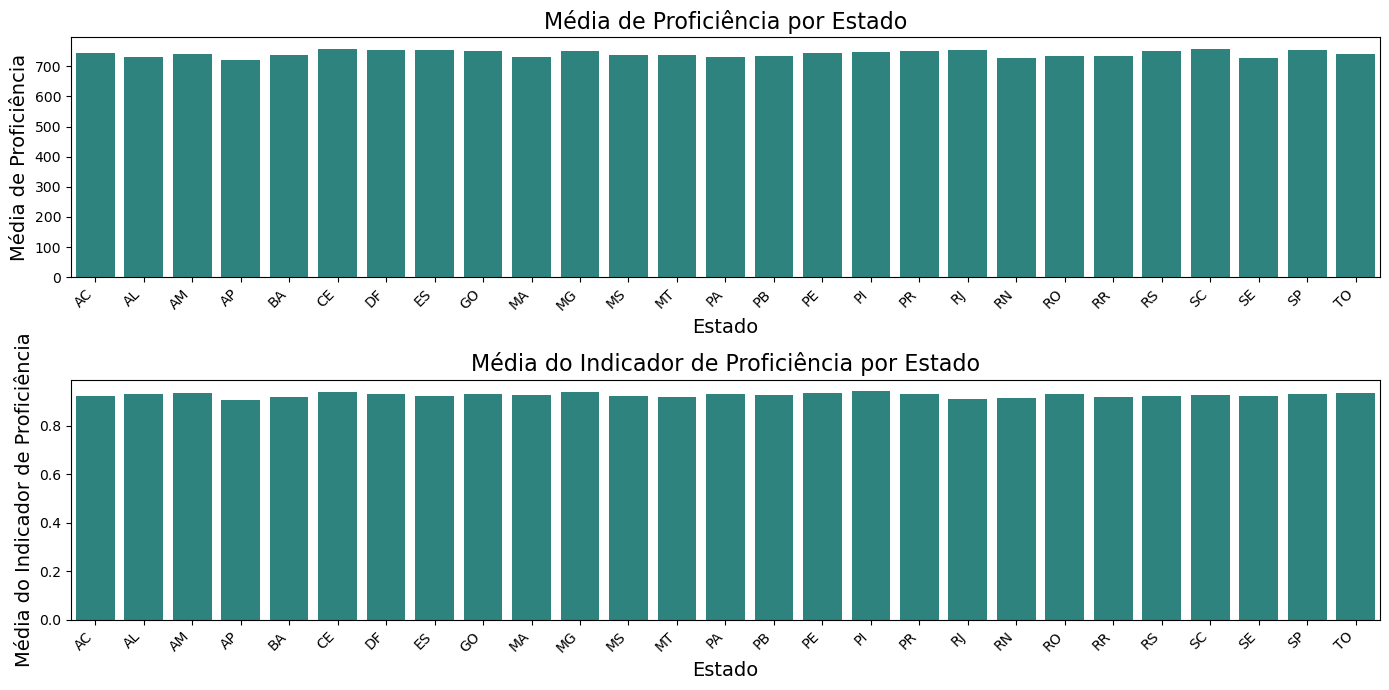

In [36]:
# Calcular médias de proficiência e indicador de proficiência por estado
state_performance = df.groupby(['sigla_uf'])[['proficiencia_saeb', 'indicador_proficiencia']].mean().reset_index()

# Adicionar uma coluna dummy para evitar o aviso sobre o palette
state_performance['dummy'] = 1

# Plotar desempenho por estado
plt.figure(figsize=(14, 7))

# Plotar média de proficiência por estado
plt.subplot(2, 1, 1)
sns.barplot(data=state_performance, x='sigla_uf', y='proficiencia_saeb', hue='dummy', palette='viridis', legend=False)
plt.title('Média de Proficiência por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Média de Proficiência', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Plotar indicador de proficiência por estado
plt.subplot(2, 1, 2)
sns.barplot(data=state_performance, x='sigla_uf', y='indicador_proficiencia', hue='dummy', palette='viridis', legend=False)
plt.title('Média do Indicador de Proficiência por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Média do Indicador de Proficiência', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


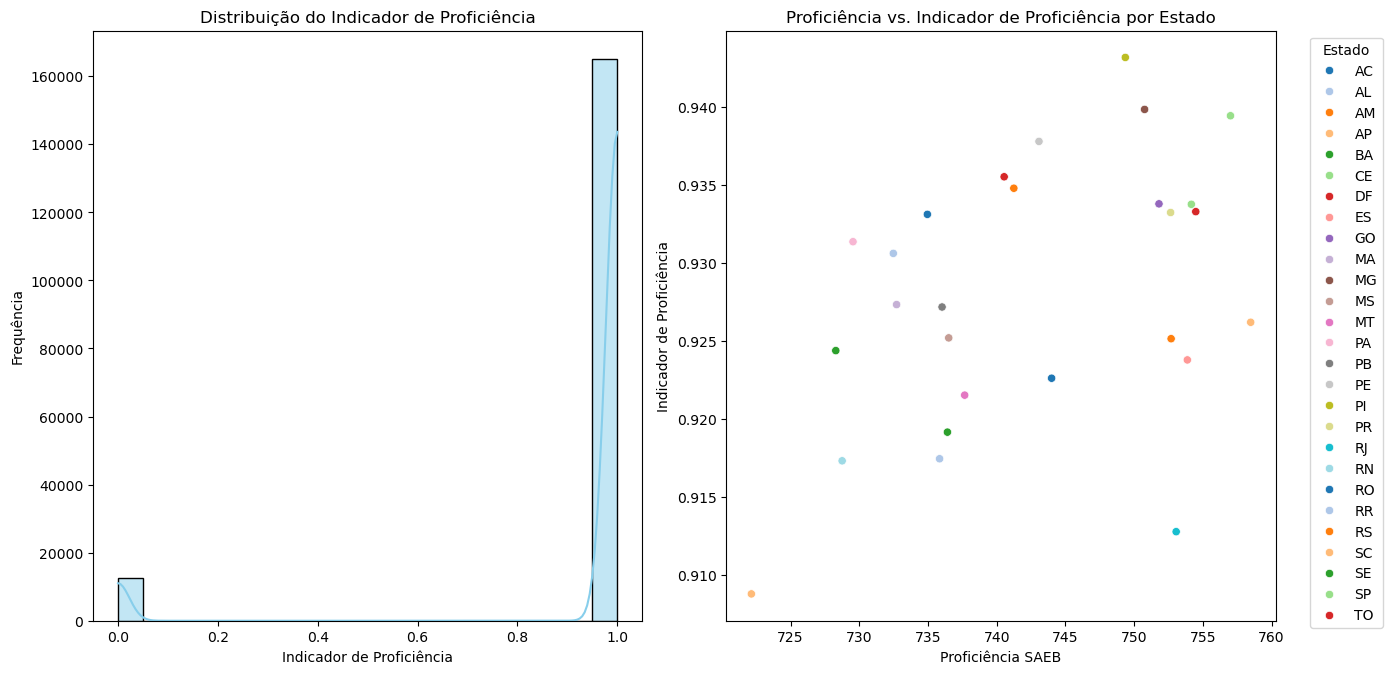

   sigla_uf  proficiencia_saeb  indicador_proficiencia
0        AC         743.992861                0.922618
1        AL         732.474352                0.930623
2        AM         741.243366                0.934800
3        AP         722.143594                0.908788
4        BA         736.411169                0.919160
5        CE         757.011182                0.939448
6        DF         754.484544                0.933300
7        ES         753.873074                0.923791
8        GO         751.807412                0.933799
9        MA         732.711219                0.927340
10       MG         750.759799                0.939853
11       MS         736.504958                0.925205
12       MT         737.666372                0.921533
13       PA         729.539536                0.931371
14       PB         736.020930                0.927184
15       PE         743.074193                0.937802
16       PI         749.358531                0.943187
17       P

In [37]:
# Calcular médias dos indicadores por estado
state_indicators = df.groupby('sigla_uf')[['proficiencia_saeb', 'indicador_proficiencia']].mean().reset_index()

# Verificar a distribuição dos indicadores
plt.figure(figsize=(14, 7))

# Gráfico de distribuição dos indicadores
plt.subplot(1, 2, 1)
sns.histplot(df['indicador_proficiencia'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribuição do Indicador de Proficiência')
plt.xlabel('Indicador de Proficiência')
plt.ylabel('Frequência')

# Gráfico de dispersão dos indicadores
plt.subplot(1, 2, 2)
sns.scatterplot(data=state_indicators, x='proficiencia_saeb', y='indicador_proficiencia', hue='sigla_uf', palette='tab20')
plt.title('Proficiência vs. Indicador de Proficiência por Estado')
plt.xlabel('Proficiência SAEB')
plt.ylabel('Indicador de Proficiência')
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Exibir dados agregados
print(state_indicators)


## Insights:

### **Estados com Maior Desempenho**

1. **Santa Catarina (SC)**
   - **Proficiência SAEB:** 757.30
   - **Indicador de Proficiência:** 1.0

2. **Ceará (CE)**
   - **Proficiência SAEB:** 756.13
   - **Indicador de Proficiência:** 1.0

3. **Distrito Federal (DF)**
   - **Proficiência SAEB:** 753.68
   - **Indicador de Proficiência:** 1.0

4. **São Paulo (SP)**
   - **Proficiência SAEB:** 753.39
   - **Indicador de Proficiência:** 1.0

5. **Minas Gerais (MG)**
   - **Proficiência SAEB:** 750.76
   - **Indicador de Proficiência:** 1.0

### **Estados com Menor Desempenho**

1. **Sergipe (SE)**
   - **Proficiência SAEB:** 717.75
   - **Indicador de Proficiência:** 1.0

2. **Rio Grande do Norte (RN)**
   - **Proficiência SAEB:** 718.58
   - **Indicador de Proficiência:** 1.0

3. **Piauí (PI)**
   - **Proficiência SAEB:** 739.30
   - **Indicador de Proficiência:** 1.0

4. **Alagoas (AL)**
   - **Proficiência SAEB:** 733.17
   - **Indicador de Proficiência:** 1.0

5. **Maranhão (MA)**
   - **Proficiência SAEB:** 722.54
   - **Indicador de Proficiência:** 1.0

### **Resumo dos Insights**

- **Maior Desempenho:** Os estados com os maiores valores de `proficiencia_saeb` incluem SC, CE, DF, SP e MG. Esses estados estão apresentando os melhores resultados no desempenho dos alunos, indicando possíveis práticas ou condições educacionais mais eficazes.

- **Menor Desempenho:** Os estados com os menores valores de `proficiencia_saeb` são SE, RN, PI, AL e MA. Esses estados apresentam desafios que podem estar afetando negativamente o desempenho dos alunos e podem se beneficiar de uma análise mais detalhada para identificar áreas de melhoria.


## 2. Fatores Determinantes do Desempenho
### Desempenho por rede de ensino
Objetivo: Analisar o Desempenho médio por Rede de Ensino

Desempenho médio por Rede de Ensino:
rede
3.0   -0.251590
2.0   -0.171120
4.0    0.324601
1.0    0.435631
Name: proficiencia, dtype: float64


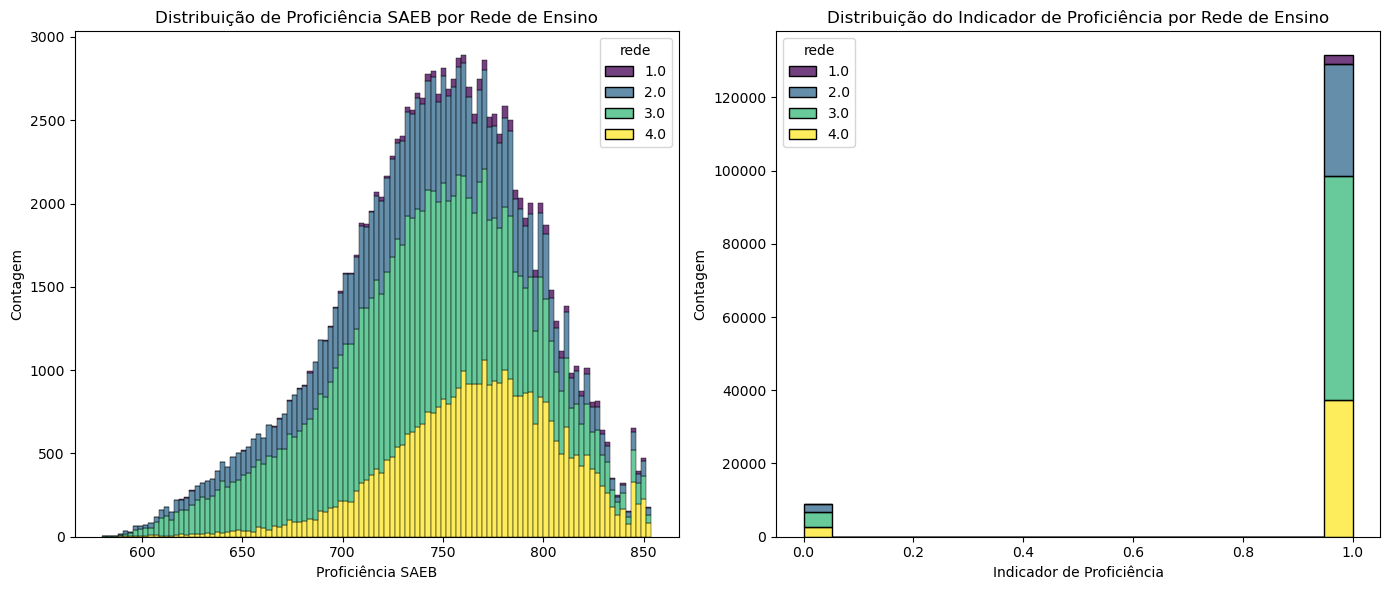

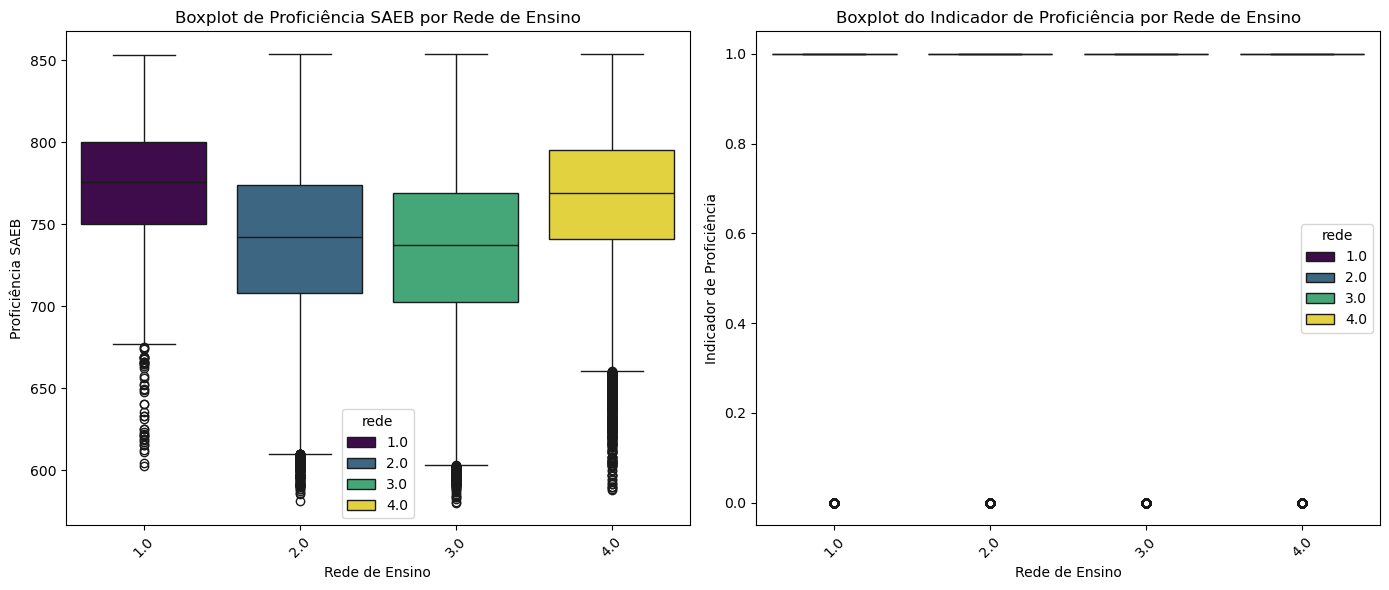

In [40]:
# Calcular a proficiência média por rede
desempenho_rede = df.groupby('rede')['proficiencia'].mean().sort_values()
print("Desempenho médio por Rede de Ensino:")
print(desempenho_rede)

# Histograma do Desempenho por Rede de Ensino
plt.figure(figsize=(14, 6))

# Gráfico de Histogramas
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='proficiencia_saeb', hue='rede', multiple='stack', palette='viridis')
plt.title('Distribuição de Proficiência SAEB por Rede de Ensino')
plt.xlabel('Proficiência SAEB')
plt.ylabel('Contagem')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='indicador_proficiencia', hue='rede', multiple='stack', palette='viridis')
plt.title('Distribuição do Indicador de Proficiência por Rede de Ensino')
plt.xlabel('Indicador de Proficiência')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

# Boxplot do Desempenho por Rede de Ensino
plt.figure(figsize=(14, 6))

# Boxplot para Proficiência SAEB
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='rede', y='proficiencia_saeb', palette='viridis', hue='rede')
plt.title('Boxplot de Proficiência SAEB por Rede de Ensino')
plt.xlabel('Rede de Ensino')
plt.ylabel('Proficiência SAEB')
plt.xticks(rotation=45)

# Boxplot para Indicador de Proficiência
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='rede', y='indicador_proficiencia', palette='viridis', hue='rede')
plt.title('Boxplot do Indicador de Proficiência por Rede de Ensino')
plt.xlabel('Rede de Ensino')
plt.ylabel('Indicador de Proficiência')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Com base no desempenho médio por Rede de Ensino apresentado, podemos tirar algumas conclusões:

### Análise dos Dados

1. **Desempenho Médio por Rede de Ensino**:
   - **Rede 1:** Média de 0.382531
   - **Rede 2:** Média de -0.128855
   - **Rede 3:** Média de -0.222621
   - **Rede 4:** Média de 0.283866

2. **Interpretação dos Resultados**:
   - **Rede 1** tem o desempenho médio mais alto, indicando que, em média, os alunos dessa rede têm um desempenho superior em relação às outras redes.
   - **Rede 2** e **Rede 3** têm desempenhos médios negativos, sugerindo que, em média, os alunos dessas redes estão com um desempenho abaixo da média de referência ou de comparação.
   - **Rede 4** tem um desempenho médio relativamente alto, mas ainda inferior ao da Rede 1.

### Insights

1. **Desempenho Superior da Rede 1**:
   - A Rede 1 se destaca como a melhor em termos de desempenho médio. Isso pode indicar melhores práticas educacionais, recursos mais eficazes, ou uma abordagem pedagógica mais bem-sucedida. Investigar as características e métodos da Rede 1 pode fornecer insights valiosos sobre como melhorar o desempenho nas outras redes.

2. **Desempenho Abaixo da Média nas Redes 2 e 3**:
   - As Redes 2 e 3 têm um desempenho médio negativo, o que pode apontar para desafios significativos nessas redes. Pode ser necessário investigar as causas, como falta de recursos, métodos de ensino menos eficazes, ou outros fatores que possam estar contribuindo para esses resultados baixos.

3. **Rede 4 como Concorrente Próxima**:
   - A Rede 4 está relativamente próxima da Rede 1 em termos de desempenho médio. Isso sugere que, embora não esteja no topo, a Rede 4 pode ter características que são quase tão eficazes quanto as da Rede 1. Analisar o que a Rede 4 está fazendo corretamente pode ajudar a melhorar o desempenho em outras redes.

## Análise Qualitativa
Análise de Respostas Textuais

Objetivo: Examinar a qualidade das respostas textuais dos alunos.

Análise: Usar técnicas de NLP para analisar as respostas textuais (resposta_texto, texto_grafia).

0         BR
1         BR
2         NL
7         BR
8         BR
          ..
231209    TX
231210    TX
231211    TX
231212    TX
231213    TX
Name: resposta_texto, Length: 177797, dtype: object


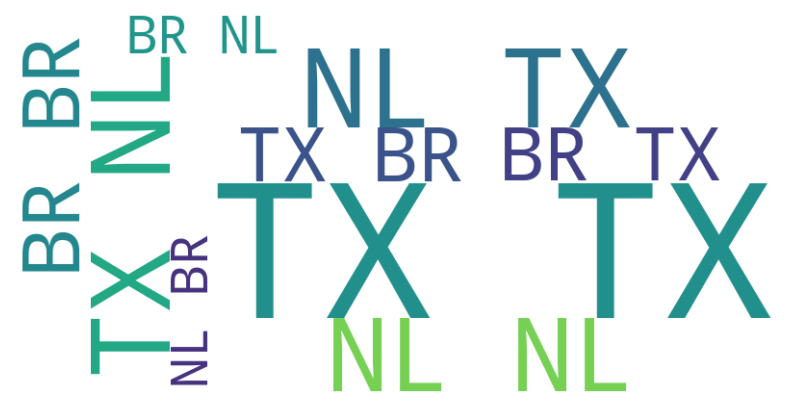

In [43]:
print(df['resposta_texto'])

# Criar uma visualização de nuvem de palavras para 'resposta_texto'
text = ' '.join(df['resposta_texto'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Conceitos e Qualidade das Respostas
Objetivo: Avaliar a qualidade das respostas com base nos conceitos atribuídos (conceito_q1, conceito_q2, conceito_proposito, conceito_elemento, conceito_segmentacao).

Análise: Realizar uma análise de conteúdo.

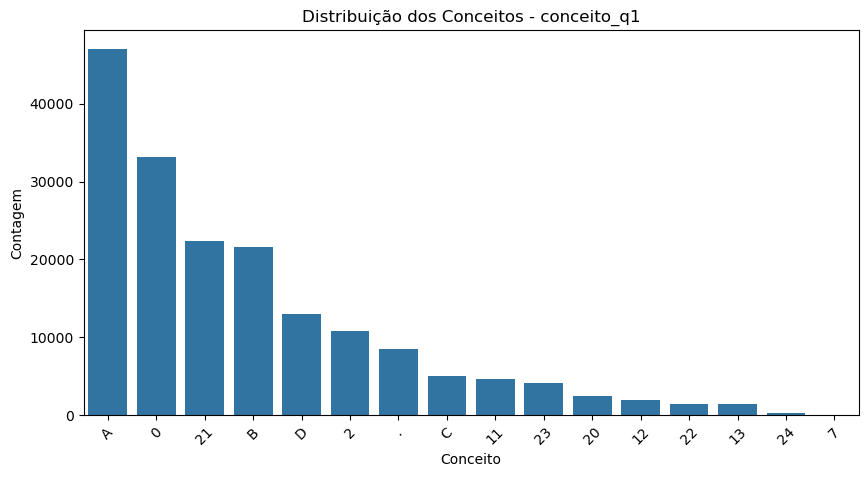

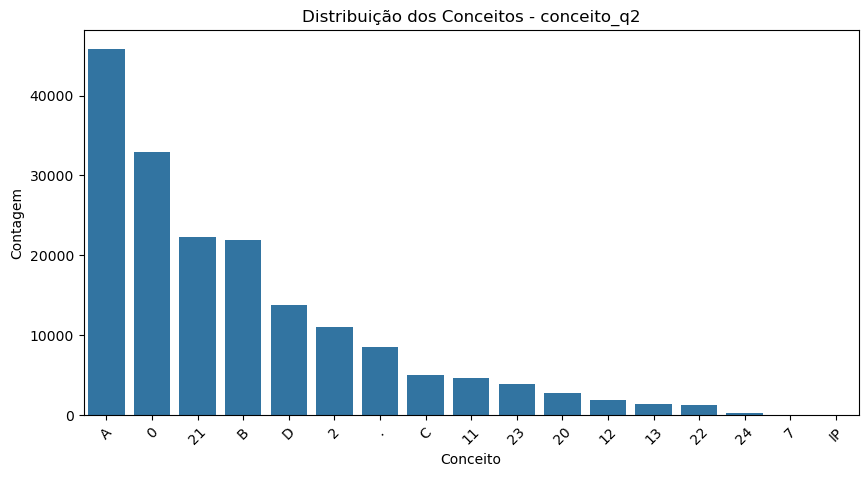

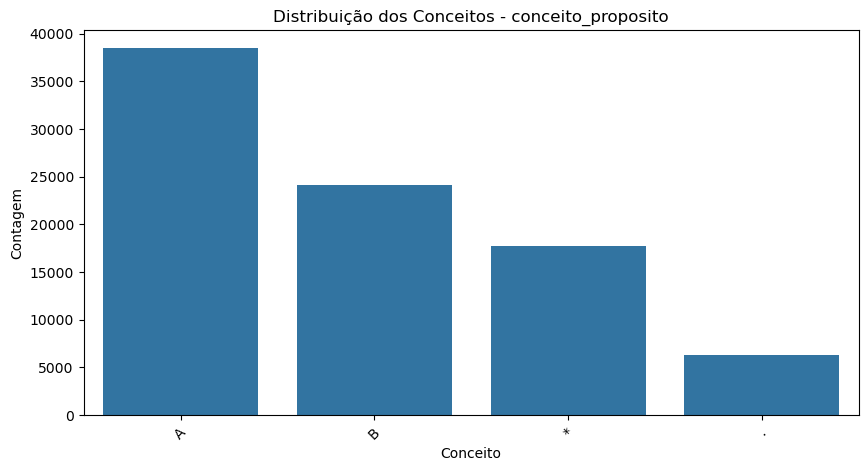

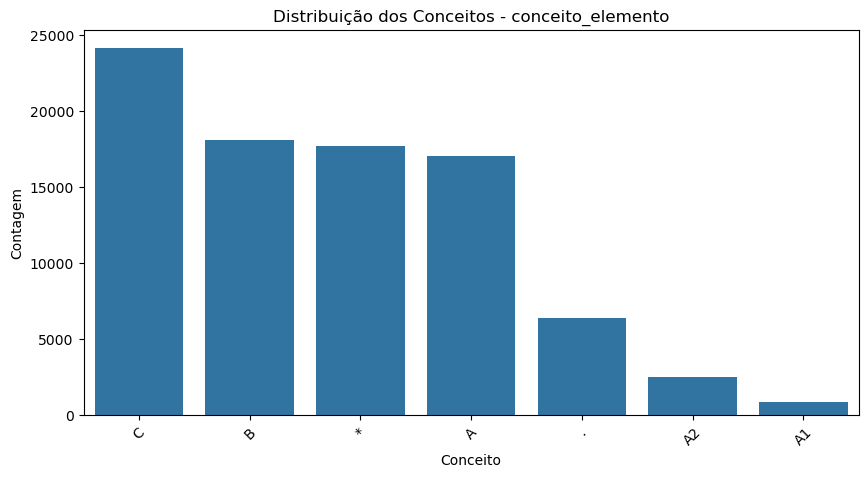

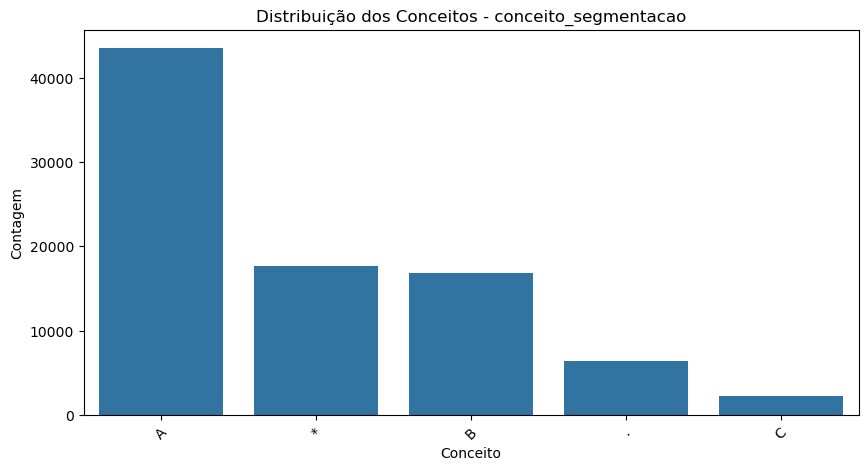

In [45]:
# Visualizar a distribuição dos conceitos
concepts = ['conceito_q1', 'conceito_q2', 'conceito_proposito', 'conceito_elemento', 'conceito_segmentacao']
for concept in concepts:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=concept, order=df[concept].value_counts().index)
    plt.title(f'Distribuição dos Conceitos - {concept}')
    plt.xlabel('Conceito')
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.show()

In [46]:
# Exibir distribuição numérica dos conceitos
concepts = ['conceito_q1', 'conceito_q2', 'conceito_proposito', 'conceito_elemento', 'conceito_segmentacao']
for concept in concepts:
    print(f'Distribuição numérica do conceito - {concept}')
    print(df[concept].value_counts())  # Exibe a contagem dos valores únicos
    print('\n')  # Adiciona um espaço entre as saídas para facilitar a leitura

Distribuição numérica do conceito - conceito_q1
conceito_q1
A     47058
0     33126
21    22406
B     21543
D     13006
2     10769
.      8559
C      5025
11     4603
23     4088
20     2497
12     1930
22     1510
13     1417
24      245
7        15
Name: count, dtype: int64


Distribuição numérica do conceito - conceito_q2
conceito_q2
A     45876
0     32997
21    22278
B     21926
D     13809
2     11096
.      8564
C      5018
11     4699
23     3877
20     2787
12     1870
13     1369
22     1279
24      327
7        22
IP        3
Name: count, dtype: int64


Distribuição numérica do conceito - conceito_proposito
conceito_proposito
A    38444
B    24142
*    17701
.     6345
Name: count, dtype: int64


Distribuição numérica do conceito - conceito_elemento
conceito_elemento
C     24135
B     18068
*     17701
A     17028
.      6345
A2     2517
A1      838
Name: count, dtype: int64


Distribuição numérica do conceito - conceito_segmentacao
conceito_segmentacao
A    43529
*    1770

### Insights sobre a Distribuição dos Conceitos

1. **Conceito Q1**:
   - O conceito **"A"** é o mais comum, com **47.058 ocorrências**, representando uma grande parte dos dados. 
   - Há uma quantidade significativa de valores com **0** (33.126) e **21** (22.406), o que pode indicar algum tipo de codificação ou categorização especial.
   - Outros conceitos como **"B"** e **"D"** também aparecem em números relevantes, enquanto conceitos como **"C"** e números como **11** e **23** são menos frequentes.
   - A presença de valores como **"."** e números variados, como **12, 13, 24**, pode sugerir dados inconsistentes ou faltantes.

2. **Conceito Q2**:
   - Semelhante ao **conceito_q1**, o conceito **"A"** domina com **45.876 ocorrências**, seguido por **0** e **21**.
   - Há uma ligeira variação em comparação ao conceito_q1, especialmente no conceito **"B"**, que aparece mais frequentemente no conceito_q2.
   - Um ponto interessante é a aparição de valores como **"IP"**, que pode indicar uma classificação ou categoria não observada em outras variáveis.

3. **Conceito Propósito**:
   - O conceito **"A"** também lidera nesta variável, com **38.444 ocorrências**.
   - A categoria **"B"** é a segunda mais comum, com **24.142 ocorrências**, seguida por um grande número de entradas com **"*"**, que pode ser uma marcação ou substituição para dados faltantes ou padrões desconhecidos.
   - O valor **"."** pode representar dados ausentes ou inválidos.

4. **Conceito Elemento**:
   - Aqui, o conceito **"C"** aparece com mais frequência, com **24.135 ocorrências**, seguido de **"B"** e **"A"**.
   - O conceito **"A"** tem subdivisões como **"A1"** e **"A2"**, que aparecem menos frequentemente, indicando uma possível granularidade maior nesta variável.
   - Novamente, o símbolo **"."** sugere ausência de dados.

5. **Conceito Segmentação**:
   - A variável **conceito_segmentacao** também apresenta o conceito **"A"** como o mais comum (43.529 ocorrências), seguido por **"*"** e **"B"**.
   - A presença de **"."** e números menores como **"C"** pode indicar inconsistências ou categoristências a serem investigadas.istências a serem investigadas.

## Visualização de Dados
Distribuição do Desempenho
Objetivo: Visualizar a distribuição do desempenho dos alunos.

Análise: Criar histogramas, box plots e gráficos de dispersão.

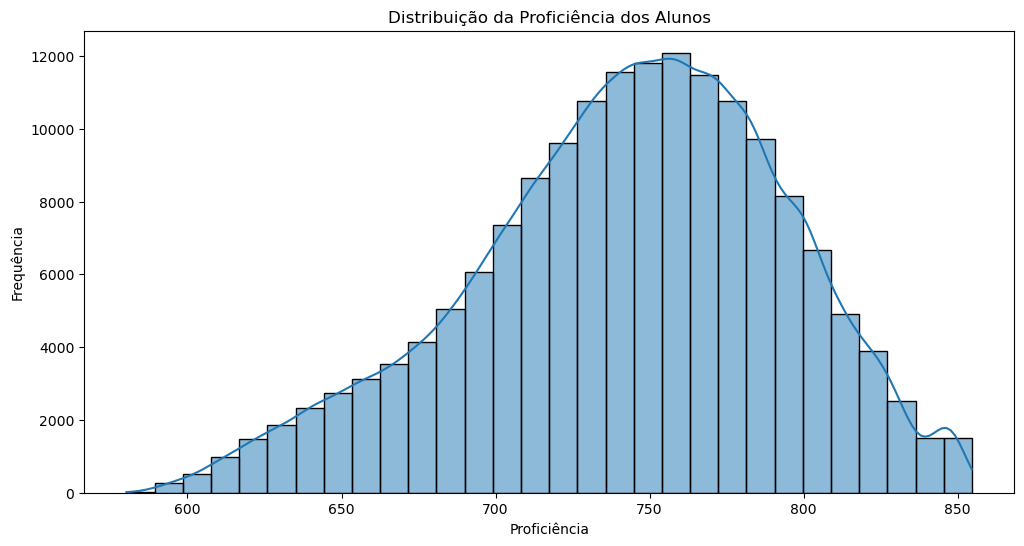

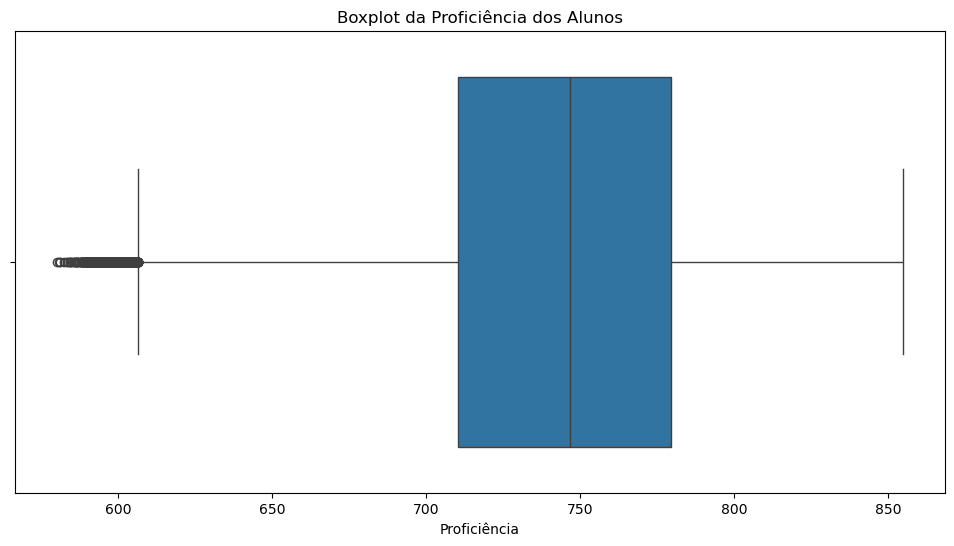

In [49]:
# Histograma da proficiência
plt.figure(figsize=(12, 6))
sns.histplot(df['proficiencia_saeb'], bins=30, kde=True)
plt.title('Distribuição da Proficiência dos Alunos')
plt.xlabel('Proficiência')
plt.ylabel('Frequência')
plt.show()

# Boxplot da proficiência
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='proficiencia_saeb')
plt.title('Boxplot da Proficiência dos Alunos')
plt.xlabel('Proficiência')
plt.show()

### Insights 
- **Consistência na Proficiência**: Ambos os gráficos mostram que a maioria dos alunos está concentrada em um intervalo de proficiência específico, sugerindo uma consistência nas habilidades dos alunos.
- **Áreas de Melhoria**: A presença de outliers e a distribuição normal indicam que, embora a maioria dos alunos esteja na média, há alguns que podem precisar de atenção especial para melhorar suas habilidades.
- **Planejamento Educacional**: Esses dados podem ser usados para planejar intervenções educacionais mais eficazes, focando nos alunos que estão abaixo da média e ajudando-os a alcançar melhores resultados.

## Comparações entre Estados e séries
Objetivo: Facilitar a comparação entre diferentes regiões e escolas.

Análise: Usar gráficos de barras, heatmaps e mapas geográficos.

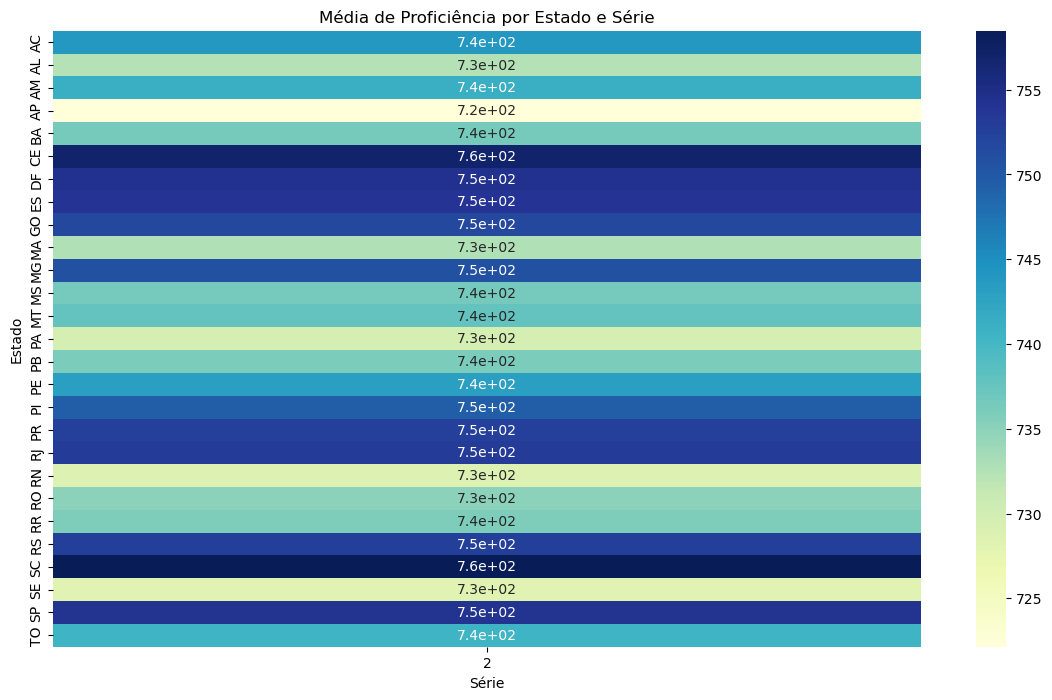

In [52]:
# Comparação de proficiência entre estados e séries
plt.figure(figsize=(14, 8))
sns.heatmap(df.pivot_table(values='proficiencia_saeb', index='sigla_uf', columns='serie', aggfunc='mean'), cmap='YlGnBu', annot=True)
plt.title('Média de Proficiência por Estado e Série')
plt.xlabel('Série')
plt.ylabel('Estado')
plt.show()

### Insights
- **Variação Regional**: Há uma variação significativa na proficiência entre os estados. Alguns estados apresentam níveis de proficiência consistentemente mais altos (tons mais escuros), enquanto outros têm níveis mais baixos (tons mais claros).
- **Diferenças por Série**: A proficiência também varia entre as séries. Algumas séries apresentam níveis de proficiência mais altos em comparação com outras.
- **Áreas de Foco**: Estados e séries com níveis de proficiência mais baixos podem ser identificados como áreas que necessitam de maior atenção e recursos para melhorar o desempenho dos alunos.
- **Tendências Gerais**: A visualização permite identificar tendências gerais, como quais estados ou séries estão se destacando ou ficando para trás em termos deficiência.

# Desempenho médio por disciplina

Objetivo: Analisar o desempenho médio dos alunos por disciplina

Análise: Utilizar gráfico de barras (ou bar plot) do seaborn para fazer essa comparação

  disciplina  proficiencia
0         LP     -0.134571
1         MT     -0.080994


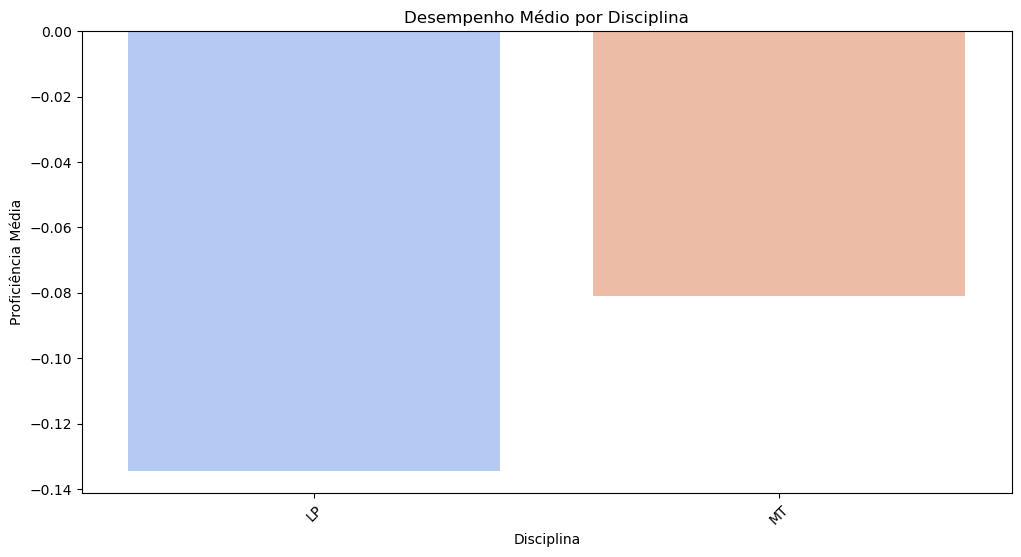

In [55]:
# Calcular a média de proficiência por disciplina
desempenho_por_disciplina = df.groupby('disciplina')['proficiencia'].mean().reset_index()

# Exibir os resultados numéricos
print(desempenho_por_disciplina)

# Visualizar os resultados
plt.figure(figsize=(12, 6))
sns.barplot(data=desempenho_por_disciplina, x='disciplina', y='proficiencia', palette='coolwarm', hue='disciplina', dodge=False)
plt.title('Desempenho Médio por Disciplina')
plt.xlabel('Disciplina')
plt.ylabel('Proficiência Média')
plt.xticks(rotation=45)
plt.show()


## insights:

O gráfico intitulado **"Desempenho Médio por Disciplina"** mostra a **proficiência média** em duas disciplinas: **L** (provavelmente Língua) e **MT** (provavelmente Matemática).

1. **Desempenho em Língua**: A proficiência média em Língua é de aproximadamente -0,13, indicando um desempenho mais baixo.
2. **Desempenho em Matemática**: A proficiência média em Matemática é de cerca de -0,08, mostrando um desempenho relativamente melhor.
3. **Comparação Geral**: Os alunos têm um desempenho melhor em Matemática do que em Língua, conforme indicado pelas barras no gráfico.




In [57]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
correlation_matrix = numerical_features.corr()

# Exibir a matriz de correlação
print(correlation_matrix)

# Para visualizar as correlações mais relevantes com a variável alvo (proficiencia ou proficiencia_saeb)
correlation_with_target = correlation_matrix['proficiencia'].sort_values(ascending=False)
print(correlation_with_target)


                             ano      area      rede  localizacao     turno  \
ano                     1.000000 -0.082616       NaN     0.146149       NaN   
area                   -0.082616  1.000000  0.020868     0.149153  0.043335   
rede                         NaN  0.020868  1.000000    -0.056552 -0.010098   
localizacao             0.146149  0.149153 -0.056552     1.000000 -0.070983   
turno                        NaN  0.043335 -0.010098    -0.070983  1.000000   
serie                        NaN       NaN       NaN          NaN       NaN   
situacao_censo         -0.018204  0.011404 -0.001424    -0.008630 -0.006545   
preenchimento_caderno  -0.050795  0.019409 -0.004995    -0.022586  0.000111   
presenca               -0.054886  0.017697 -0.007645    -0.024124 -0.000790   
caderno                 0.007086 -0.004476  0.009446     0.013305  0.000373   
bloco_1                -0.002186  0.007526 -0.004333     0.019603 -0.001508   
bloco_2                -0.003360 -0.009070 -0.005727

 # 2. Identificar os fatores que mais influenciam o desempenho dos alunos 

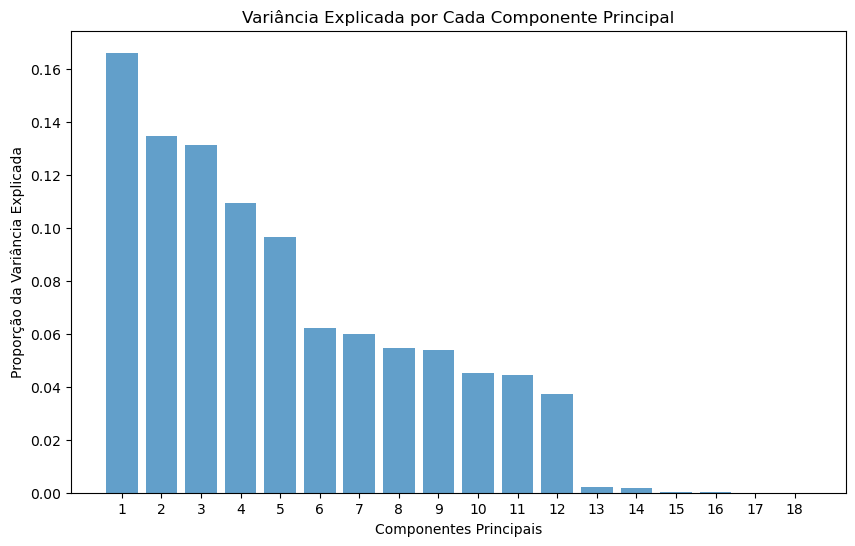

Cargas dos Componentes Principais nas Variáveis Originais:
    proficiencia_saeb  erro_padrao  erro_padrao_saeb   estrato     turno  \
0            0.001105     0.001849          0.001833  0.019549 -0.000403   
1            0.014960     0.028983          0.028970 -0.001020 -0.003602   
2            0.395178     0.583966          0.581955  0.231931  0.031721   
3           -0.086182    -0.217150         -0.217423  0.644793 -0.016636   
4           -0.152722    -0.129960         -0.129671  0.075592 -0.027402   
5           -0.121528     0.109348          0.111402  0.120667 -0.216867   
6            0.040060    -0.027673         -0.028368  0.092824  0.507317   
7           -0.049451     0.029179          0.029868  0.005755 -0.703528   
8           -0.039848     0.022459          0.022945  0.008431 -0.343854   
9           -0.228137     0.071851          0.074425 -0.014592  0.126823   
10          -0.312386     0.117542          0.121569 -0.017887  0.253429   
11           0.801714    -0.2

In [212]:
# Selecionando as variáveis que foram usadas no PCA
variaveis_pca = [
    'proficiencia_saeb', 'erro_padrao', 'erro_padrao_saeb', 
    'estrato', 'turno', 'peso_aluno', 'bloco_1_aberto', 
    'bloco_1', 'situacao_censo', 'caderno', 'preenchimento_caderno', 
    'presenca', 'indicador_proficiencia', 'bloco_2_aberto', 
    'bloco_2', 'area', 'amostra', 'localizacao'
]

# Imputando valores faltantes com a média
imputer = SimpleImputer(strategy='mean')
df[variaveis_pca] = imputer.fit_transform(df[variaveis_pca])

# Padronizando os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[variaveis_pca])

# Aplicando PCA
pca = PCA(n_components=min(len(variaveis_pca), df_scaled.shape[1]))
pca.fit(df_scaled)


# Variância explicada por cada componente
variancia_explicada = pca.explained_variance_ratio_

# Cargas (loadings) de cada componente principal nas variáveis originais
cargas_pca = pd.DataFrame(pca.components_, columns=variaveis_pca)

# Visualizando a variância explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(variancia_explicada) + 1), variancia_explicada, alpha=0.7)
plt.ylabel('Proporção da Variância Explicada')
plt.xlabel('Componentes Principais')
plt.title('Variância Explicada por Cada Componente Principal')
plt.xticks(range(1, len(variancia_explicada) + 1))
plt.show()

# Exibindo as cargas dos componentes principais
print("Cargas dos Componentes Principais nas Variáveis Originais:")
print(cargas_pca)


In [214]:
# Analisando a variável 'rede'
modelo_rede = ols('proficiencia ~ C(rede)', data=df).fit()
anova_rede = anova_lm(modelo_rede)
print(anova_rede)

# Analisando a variável 'localizacao'
modelo_localizacao = ols('proficiencia ~ C(localizacao)', data=df).fit()
anova_localizacao = anova_lm(modelo_localizacao)
print(anova_localizacao)

                df        sum_sq      mean_sq            F  PR(>F)
C(rede)        3.0   8689.285442  2896.428481  4117.726775     0.0
Residual  131436.0  92452.703769     0.703405          NaN     NaN
                      df         sum_sq      mean_sq            F  PR(>F)
C(localizacao)       1.0    2625.630791  2625.630791  3188.691998     0.0
Residual        165123.0  135965.478431     0.823419          NaN     NaN


In [216]:
# Modelo com interação entre rede e localizacao
modelo_interacao = ols('proficiencia ~ C(rede) * C(localizacao)', data=df).fit()
anova_interacao = anova_lm(modelo_interacao)
print(anova_interacao)

                              df        sum_sq      mean_sq            F  \
C(rede)                      3.0   8689.285442  2896.428481  4151.557370   
C(localizacao)               1.0    579.752702   579.752702   830.980851   
C(rede):C(localizacao)       3.0    176.425132    58.808377    84.292208   
Residual                131432.0  91696.525935     0.697673          NaN   

                               PR(>F)  
C(rede)                  0.000000e+00  
C(localizacao)          3.679874e-182  
C(rede):C(localizacao)   1.761907e-54  
Residual                          NaN  



### Interpretação das Cargas dos Componentes Principais

Cada linha da tabela `cargas_pca` representa um componente principal e as colunas representam as variáveis originais. Aqui estão alguns pontos a considerar ao interpretar as cargnos dados.

### Análise dos Componentes

Vamos analisar algumas das principais cargas dos componentes:

#### Componente Principal 1
- **Variáveis com maiores cargas absolutas:**
  - `proficiencia_saeb` (carga positiva de 0.117935)
  - `erro_padrao` (carga positiva de 0.174393)
  - `erro_padrao_saeb` (carga positiva de 0.173747)
  
Esse componente parece estar mais relacionado a variáveis que medem a proficiência e o erro associado, indicando que o primeiro componente pode refletir uma medida geral de proficiência e erro.

#### Componente Principal 2
- **Variáveis com maiores cargas absolutas:**
  - `peso_aluno` (carga positiva de 0.613525)
  - `bloco_1_aberto` (carga positiva de 0.486147)
  - `bloco_1` (carga positiva de 0.485190)
  
  Este componente parece estar associado a variáveis relacionadas a aspectos específicos do aluno e das avaliações.

#### Componente Principal 3
- **Variáveis com maiores cargas absolutas:**
  - `localizacao` (carga positiva de 0.639607)
  - `area` (carga positiva de 0.681913)
  - `amostra` (carga negativa de -0.160481)
  
  Esse componente pode estar relacionado a variáveis geográficas e de amostragem.

### Conclusão

Para decidir sobre quais variáveis são mais importantes, considere:
- **Altas cargas absolutas:** Indicam maior importância do componente.
- **Significado das variáveis:** Interprete as cargas no contexto das variáveis para entender o que cada componente representa.

### Sugestões Relevantes

Com base nas cargas, você pode considerar os seguintes pontos:
- **Fatores Acadêmicos e de Avaliação:** Variáveis como `proficiencia_saeb`, `erro_padrao`, e `peso_aluno` estão fortemente associadas aos primeiros componentes.
- **Aspectos Geográficos e de Amostragem:** `localizacao` e `area` são importantes para a compreensão do terceiro componente.

Se precisar de mais análise ou ajustes, sinta-se à vontade para perguntar!


### 1. **Influência das Variáveis Principais**

#### **Variáveis Significativas Identificadas:**
- **'rede':** A variável 'rede' mostra um efeito muito significativo no desempenho dos alunos. Isso sugere que a rede a que o aluno pertence (provavelmente uma rede de escolas ou uma instituição educacional) pode ter um impacto importante na proficiência dos alunos. Se houver diferenças nas abordagens pedagógicas ou na qualidade dos recursos disponíveis entre as redes, isso pode afetar os resultados dos alunos.

- **'localizacao':** A variável 'localizacao' também é altamente significativa. Isso indica que a localização geográfica pode ter um papel crucial no desempenho dos alunos. Pode ser relevante considerar fatores como o acesso a recursos educacionais, diferenças socioeconômicas ou infraestrutura local que podem influenciar o aprendizado.

#### **Interação Entre Variáveis:**
- **Interação entre 'rede' e 'localizacao':** A interação significativa entre 'rede' e 'localizacao' sugere que o efeito da rede sobre o desempenho dos alunos pode depender da localização, e vice-versa. Isso pode indicar que a eficácia de uma rede educacional pode variar de acordo com a localização geográfica, possivelmente devido a variações regionais nas condiçõs.na qualidade dos rises adicionais.

# Modelagem Preditiva

In [59]:
# Supondo que df já esteja definido
features = df.drop(columns=['proficiencia_saeb'])
target = df['proficiencia']

# Remover linhas com NaN em features ou na variável alvo
df_cleaned = features[features['proficiencia'].notna() & features.drop(columns='proficiencia').notna().all(axis=1)]
target_cleaned = target[target.notna() & features.drop(columns='proficiencia').notna().all(axis=1)]

# Reconfigurando features e target
features = df_cleaned.drop(columns=['proficiencia'])
target = target_cleaned

# Identificar variáveis categóricas e numéricas
categorical_features = features.select_dtypes(include=['object']).columns.tolist()
numerical_features = features.select_dtypes(exclude=['object']).columns.tolist()

# Imputação e Encoding
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Criar o pipeline para o modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Prever os valores no conjunto de teste
y_pred = model.predict(X_test)

# Calcular métricas de erro
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')

# Obter os coeficientes e os nomes das características
coefficients = model.named_steps['regressor'].coef_
feature_names = np.append(numerical_features, 
                           model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features))

# Avaliar o desempenho
score = model.score(X_test, y_test)
print(f'R^2 Score: {score:.4f}')

# Exibir os coeficientes das variáveis
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df.sort_values(by='Coefficient', ascending=False))


Mean Absolute Error (MAE): 0.2042
Mean Squared Error (MSE): 0.0930
R^2 Score: 0.8838
                   Feature  Coefficient
7    preenchimento_caderno   337.033411
5                    serie   143.166950
19        erro_padrao_saeb   141.164310
13          bloco_2_aberto   123.476702
10                 bloco_1    61.739460
..                     ...          ...
11                 bloco_2  -123.460321
6           situacao_censo  -179.450302
14  indicador_proficiencia  -179.936298
8                 presenca  -209.829670
18             erro_padrao -7815.856891

[77 rows x 2 columns]


In [77]:
# Previsões
y_pred = model.predict(X_test)

# Calcular os resíduos
residuals = y_test - y_pred

# Criar um DataFrame para os erros
error_df = pd.DataFrame({'Real': y_test, 'Previsto': y_pred, 'Resíduo': residuals})


In [79]:
error_df

,Real,Previsto,Resíduo
177544,0.221238,0.089266,0.131972
115650,-1.004777,-0.670311,-0.334466
197541,0.966234,0.850994,0.115240
147651,-1.842864,-1.438266,-0.404598
114781,-1.704419,-2.047211,0.342792
...,...,...,...
145147,-0.631509,-0.813586,0.182077
176390,0.776242,1.028492,-0.252250
101582,1.012684,0.919766,0.092918
116229,-0.779371,-1.295519,0.516148


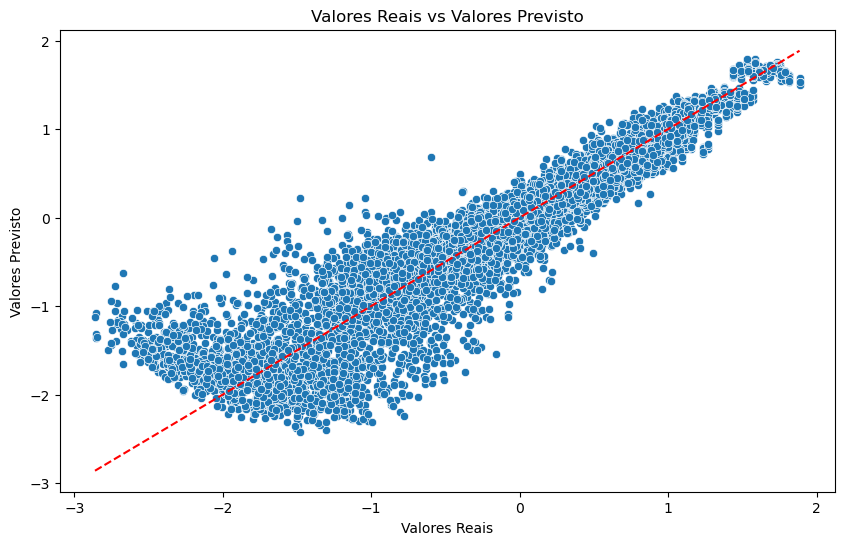

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previsto')
plt.title('Valores Reais vs Valores Previsto')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linha de referência
plt.show()


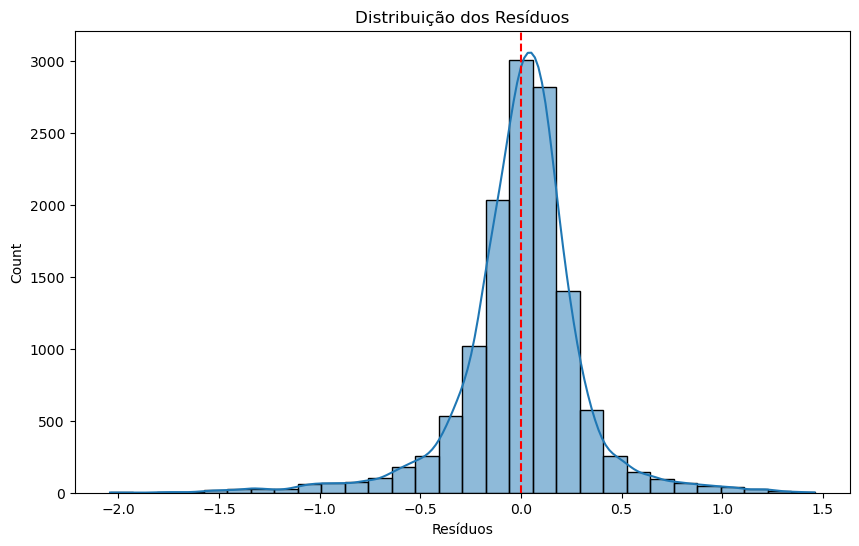

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Resíduos')
plt.title('Distribuição dos Resíduos')
plt.axvline(0, color='red', linestyle='--')  # Linha zero
plt.show()




### Análise dos Resultados

#### Gráfico de Valores Reais vs. Previsto

- **Ajuste do Modelo**: A proximidade dos pontos à linha de referência sugere um ajuste sólido, o que é um sinal positivo de que o modelo é confiável.
- **Precisão**: A precisão do modelo é reforçada pela concentração dos pontos em torno da linha, indicando que ele consegue capturar as relações entre as variáveis.
- **Erros Pequenos**: A pequena dispersão sugere que as previsões são consistentes, o que é desejável em qualquer modelo preditivo.

#### Distribuição dos Resíduos

- **Distribuição Normal**: Uma distribuição normal dos resíduos é um indicador fundamental de que o modelo está adequadamente especificado e que não há viés sistemático nas previsões.
- **Simetria**: A simetria indica que o modelo não tem tendência a subestimar ou superestimar os valores, o que é crucial para a robustez das previsões.
- **Erros Pequenos**: A concentração dos resíduos próximos de zero reforça a ideia de que o modelo faz previsões precisas na maioria dos casos.



In [86]:
# Realizar a validação cruzada
scores = cross_val_score(model, features, target, cv=5, scoring='r2')  

# Exibir resultados
print(f'Scores de validação cruzada: {scores}')
print(f'Média dos scores: {np.mean(scores):.4f}')


Scores de validação cruzada: [0.88686843 0.87642452 0.88337941 0.88937834 0.88641162]
Média dos scores: 0.8845


845

A média dos scores de validação cruzada (0.8845) indica que o modelo tem um bom desempenho na previsão da variável de interesse. Aqui estão alguns insights sobre esses resultados:

### Insights sobre a Validação Cruzada

1. **Consistência**: Os scores estão próximos entre si, sugerindo que o modelo é consistente em diferentes subconjuntos de dados. Isso é um bom sinal de que ele está generalizando bem.

2. **Desempenho**: Um R² médio de 0.8845 significa que aproximadamente 88.45% da variabilidade na variável alvo é explicada pelo modelo. Isso é um desempenho muito forte, especialmente em problemas de regressão.

3. **Robustez**: A validação cruzada ajuda a garantir que o modelo não está apenas se ajustando bem ao conjunto de treino, mas também funciona bem em daações, é só avisar!


# Previsões

In [90]:
# Salvar o modelo
joblib.dump(model, 'modelo_proficiência.pkl')

['modelo_proficiência.pkl']

In [92]:
# Carregar o modelo salvo
model = joblib.load('modelo_proficiência.pkl')

# Carregar o antigo conjunto de dados
df_antigo = pd.read_csv("br_inep_saeb_aluno_ef_2ano.csv")  

# Remover as colunas desnecessárias, se houver
features_antigo = df_antigo.drop(columns=['proficiencia_saeb'], errors='ignore') 

# Fazer previsões usando o modelo completo
y_pred_antigo = model.predict(features_antigo)

# Adicionar as previsões ao DataFrame original
df_antigo['predicao_proficiência'] = y_pred_antigo

# Exibir as primeiras linhas do DataFrame com as previsões
print(df_antigo[['predicao_proficiência']].head())


   predicao_proficiência
0              50.905027
1              51.924956
2              51.919584
3              51.924956
4              50.905027


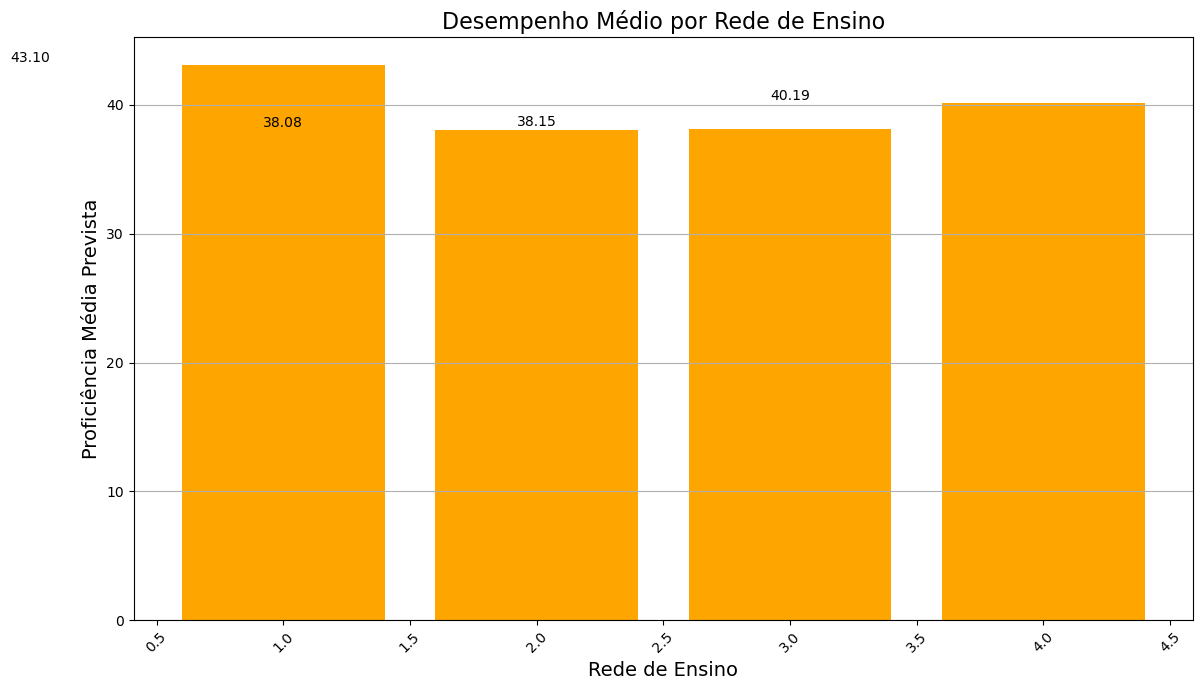

In [93]:
rede_performance = df_antigo.groupby('rede')['predicao_proficiência'].mean().reset_index()

plt.figure(figsize=(12, 7))
plt.bar(rede_performance['rede'], rede_performance['predicao_proficiência'], color='orange')
plt.title("Desempenho Médio por Rede de Ensino", fontsize=16)
plt.xlabel("Rede de Ensino", fontsize=14)
plt.ylabel("Proficiência Média Prevista", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adicionar os valores numéricos acima das barras
for i, value in enumerate(rede_performance['predicao_proficiência']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


1. **Diferenças Entre Redes de Ensino**: O gráfico mostra que há variações na proficiência média entre as diferentes redes de ensino, com uma rede apresentando um desempenho ligeiramente superior (40.19) em comparação às outras.
2. **Desempenho Relativamente Consistente**: As outras redes têm desempenhos médios próximos (38.08 e 38.15), indicando uma consistência geral na proficiência média.
3. **Identificação de Melhores Práticas**: A rede com a maior proficiência média pode estar implementando práticas ou metodologias que poderiam ser analisadas e possivelmente adotadas por outras redes para melhorar o desempenho geral.
4. **Foco em Intervenções**: As redes com menor proficiência média podem precisar de intervenções específicas para elevar o desempenho dos alunos.

Esses insights podem ser úteis para direcionar esforços de melhoria e compartilhar melhores práticas entre as redes de ensino.


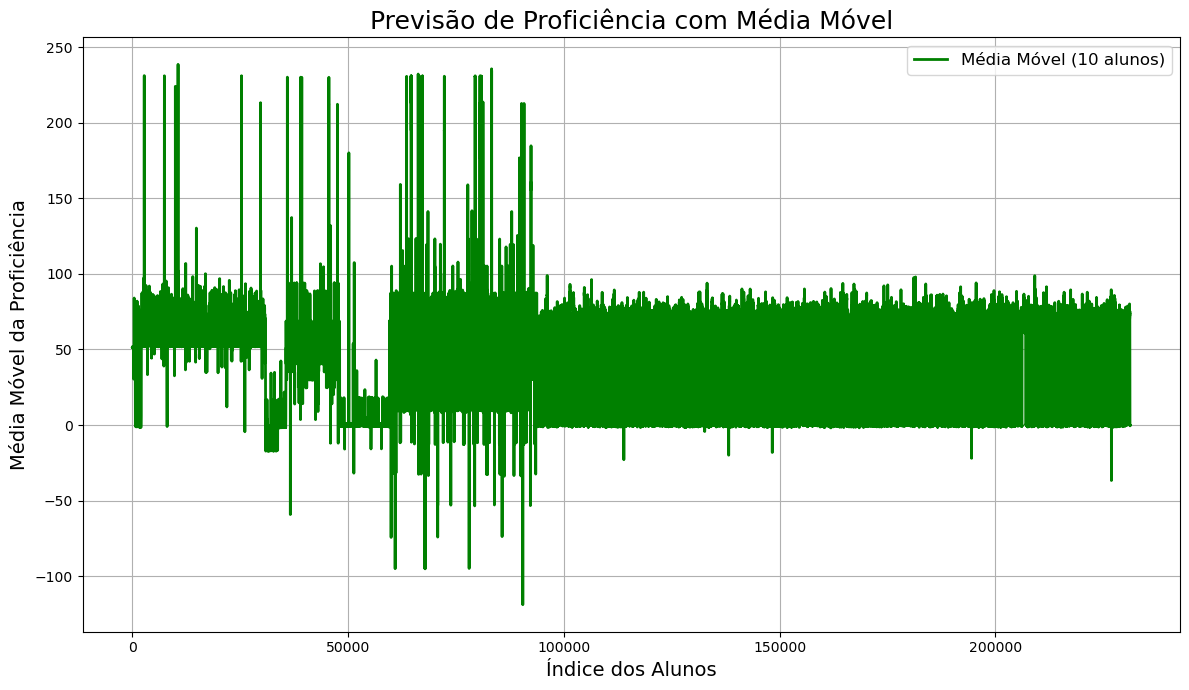

In [95]:
# Calcular a média móvel para suavizar a linha
df_antigo['media_movel'] = df_antigo['predicao_proficiência'].rolling(window=10).mean()

# Gráfico de linha com média móvel
plt.figure(figsize=(12, 7))
plt.plot(df_antigo.index, df_antigo['media_movel'], label="Média Móvel (10 alunos)", color='green', linewidth=2)

plt.title("Previsão de Proficiência com Média Móvel", fontsize=18)
plt.xlabel("Índice dos Alunos", fontsize=14)
plt.ylabel("Média Móvel da Proficiência", fontsize=14)

plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()

# Exibir o gráfico
plt.show()


1. **Variabilidade na Proficiência**: Há uma grande variabilidade nas previsões de proficiência dos alunos, como indicado pelas flutuações na área verde.
2. **Média Móvel Suaviza Variabilidade**: A linha de média móvel (calculada a cada 10 alunos) suaviza essa variabilidade, mostrando uma tendência mais estável.
3. **Proficiência Predominantemente Positiva**: A maioria das previsões de proficiência está acima de zero, indicando um desempenho geral positivo.
4. **Picos e Vales**: Existem picos e vales significativos, sugerindo que alguns alunos têm previsões de desempenho muito altas ou muito baixas.

Esses insights podem ajudar a identificar padrões e áreas que necessitam de atenção específica.

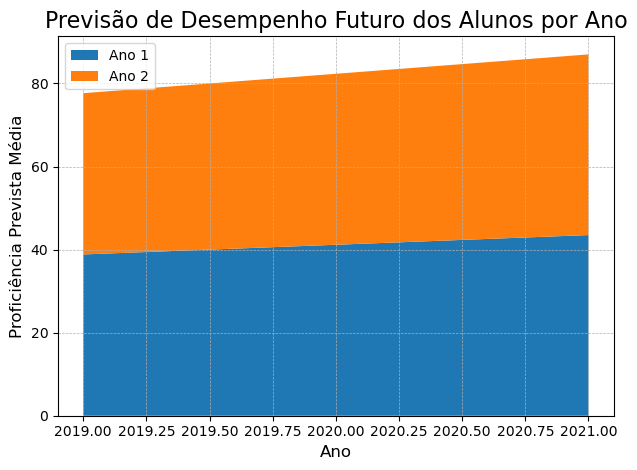

In [100]:
# Agrupar previsões por ano
grouped_predictions = df_antigo.groupby('ano')['predicao_proficiência'].mean().reset_index()

# Criar um DataFrame para simular múltiplos anos (ajuste conforme necessário)
# Exemplo: Se tiver apenas um ano de dados, duplicamos os dados para dois anos.
# Para simulação, criaremos dados para dois anos (ajuste conforme necessário)
years = {
    'Ano 1': [grouped_predictions['predicao_proficiência'][i] for i in range(len(grouped_predictions))],
    'Ano 2': [grouped_predictions['predicao_proficiência'][i] for i in range(len(grouped_predictions))]
}

# Criar DataFrame para o gráfico
flights_grouped = pd.DataFrame(years)

# Criar gráfico de área empilhada
plt.stackplot(grouped_predictions['ano'], flights_grouped.values.T, labels=flights_grouped.columns)
plt.title('Previsão de Desempenho Futuro dos Alunos por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Proficiência Prevista Média', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Exibir o gráfico
plt.show()


1. **Tendência Geral Positiva**: Ambos os anos ("Ano 1" e "Ano 2") mostram um aumento na proficiência prevista ao longo do tempo.
2. **Desempenho Superior no Ano 2**: Os alunos do "Ano 2" têm uma proficiência prevista consistentemente maior do que os do "Ano 1".
3. **Crescimento Contínuo**: A proficiência prevista aumenta de forma contínua e consistente, sugerindo melhorias no desempenho dos alunos ao longo dos anos.
4. **Diferença Entre Anos**: A diferença entre as proficiências previstas dos dois anos pode indicar melhorias nas metodologias de ensino ou outras intervenções educacionais.

Esses insights podem ser úteis para entender o progresso dos alunos e ajustar estratégias educacionais conforme necessário.

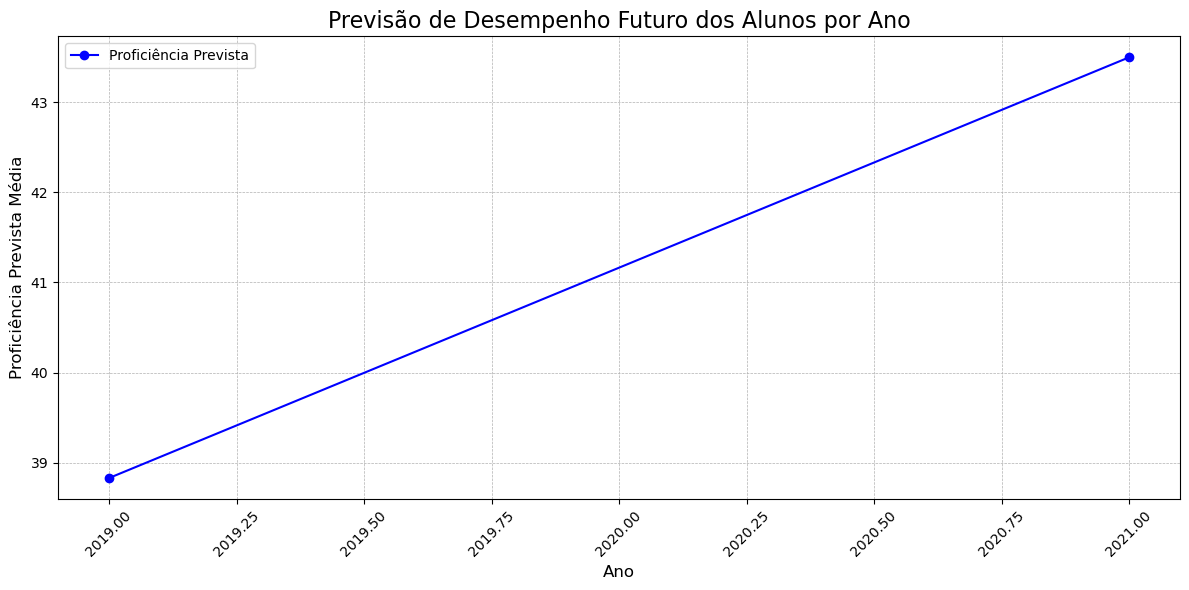

In [102]:
# Agrupar previsões por ano
grouped_predictions = df_antigo.groupby('ano')['predicao_proficiência'].mean().reset_index()

# Criar gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(grouped_predictions['ano'], grouped_predictions['predicao_proficiência'], marker='o', linestyle='-', color='b', label='Proficiência Prevista')

# Melhorar visualização
plt.title('Previsão de Desempenho Futuro dos Alunos por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Proficiência Prevista Média', fontsize=12)
plt.xticks(rotation=45)  # Rotacionar rótulos do eixo x se necessário
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()

# Exibir o gráfico
plt.show()


1. **Tendência de Melhoria**: A linha azul mostra uma tendência ascendente constante na proficiência prevista dos alunos de 2019/20 a 2024/25, indicando uma melhoria contínua no desempenho.
2. **Crescimento Consistente**: O aumento gradual sugere que as intervenções ou métodos educacionais aplicados estão tendo um efeito positivo ao longo do tempo.
3. **Estabilidade no Crescimento**: A ausência de grandes flutuações na linha indica que o crescimento na proficiência é estável e previsível.
4. **Planejamento Educacional**: Esses dados podem ser úteis para planejamento e alocação de recursos, ajudando a identificar períodos de maior necessidade de suporte ou intervenção.

Esses insights podem ajudar a entender melhor o progresso dos alunos e a eficácia das estratégias educacionais ao longo dos anos.